# a) best time and days of week to minimise delays each year for 10 consecutive years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams 

# Finding the best times to minimise flight delay

### We want to identify between Departure and Arrival which variable affects the delays more 

#### Put this file into the folder containing relevant year csv and other csvs 

In [2]:
# Read 10 consecutive years of data and label them accordingly to prevent overlap in dataframes

df99= pd.read_csv("1999.csv")
df00= pd.read_csv("2000.csv")
df01= pd.read_csv("2001.csv", encoding='iso-8859-1') # The encoding is only needed for 2001.csv and 2002.csv as it contains some characters that cant be read 
df02= pd.read_csv("2002.csv", encoding='iso-8859-1')
df03= pd.read_csv("2003.csv")
df04= pd.read_csv("2004.csv")
df05= pd.read_csv("2005.csv")
df06= pd.read_csv("2006.csv")
df07= pd.read_csv("2007.csv")
df08= pd.read_csv("2008.csv")

C:\Users\clare\AppData\Local\Temp\ipykernel_1612\2530337055.py:7: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df03= pd.read_csv("2003.csv.bz2")


#### We group the 10 years of data into one list. At the sametime, we filter out flights that Diverted during its course as it give rise to discrepancy in Arrival times and we also filter out Cancelled flights as in the dataframe, the delay columns would be inputed as NaN. We further filter the columns, only wanting DepDelay, ArrDelay to compare these 2 variables 

In [3]:
# List of DataFrames with only specified columns and filtered for non-diverted and non-cancelled flights
dfs_total = [
    df99[(df99['Diverted'] == 0) & (df99['Cancelled'] == 0)][['DepDelay', 'ArrDelay','Year']],
    df00[(df00['Diverted'] == 0) & (df00['Cancelled'] == 0)][['DepDelay', 'ArrDelay','Year']],
    df01[(df01['Diverted'] == 0) & (df01['Cancelled'] == 0)][['DepDelay', 'ArrDelay','Year']],
    df02[(df02['Diverted'] == 0) & (df02['Cancelled'] == 0)][['DepDelay', 'ArrDelay','Year']],
    df03[(df03['Diverted'] == 0) & (df03['Cancelled'] == 0)][['DepDelay', 'ArrDelay','Year']],
    df04[(df04['Diverted'] == 0) & (df04['Cancelled'] == 0)][['DepDelay', 'ArrDelay','Year']],
    df05[(df05['Diverted'] == 0) & (df05['Cancelled'] == 0)][['DepDelay', 'ArrDelay','Year']],
    df06[(df06['Diverted'] == 0) & (df06['Cancelled'] == 0)][['DepDelay', 'ArrDelay','Year']],
    df07[(df07['Diverted'] == 0) & (df07['Cancelled'] == 0)][['DepDelay', 'ArrDelay','Year']],
    df08[(df08['Diverted'] == 0) & (df08['Cancelled'] == 0)][['DepDelay', 'ArrDelay','Year']]
]

# List to store results for each year
results = []


#### We calculate the total number of flights, total number of departing flights that were delayed and total number of arriving flights that were delayed first. 
#### We group ontime and earlier flights into the same group called ontime 
#### After that, we use the above mentioned values to find the percentages of both Departure and Arrival flights that are on time and delayed 
#### We finally then group all these numbers into results

In [4]:
# Calculate results for each year by using a loop for easier calculation 
for year, df_year in zip(range(1999, 2009), dfs_total): # We set the highest year bound as 2009 as it ensures the loop will iterate up to 2008
    total_flights = len(df_year) # len means length
    num_delayed_dep_flights = len(df_year[df_year['DepDelay'] > 0])  
    num_delayed_arr_flights = len(df_year[df_year['ArrDelay'] > 0])
    # delays is counted as > 0 as = 0 means on time and < 0 is arriving / departing earlier than scheduled
    
    percentage_delayed_dep = (num_delayed_dep_flights / total_flights) * 100
    percentage_on_time_dep = 100 - percentage_delayed_dep
    
    percentage_delayed_arr = (num_delayed_arr_flights / total_flights) * 100
    percentage_on_time_arr = 100 - percentage_delayed_arr
    
    results.append({
        'Year': year,
        'Percentage Delayed Departure': percentage_delayed_dep,
        'Percentage On-Time Departure': percentage_on_time_dep,
        'Percentage Delayed Arrival': percentage_delayed_arr,
        'Percentage On-Time Arrival': percentage_on_time_arr
    })

#### Converting results into 1 dataframe for easier manipulation later on 

In [5]:
# Convert results to DataFrame
ten_years_df = pd.DataFrame(results)

#### Plotting a diagram that consisits of 4 bar graphs in each individual year to visualise the trends across the 10 years easily. 
#### the 4 bar graphs are : On time departure flights , delayed departure flights , On time arrival flights, delayed arrival flights
                          

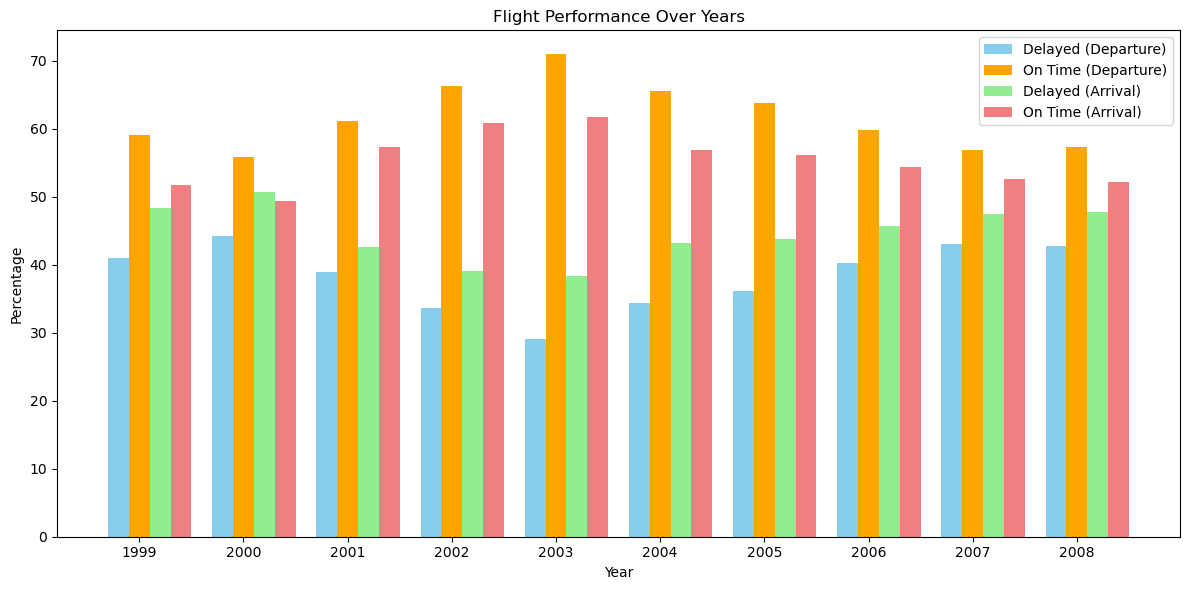

In [6]:
# Plot the results
from matplotlib import rcParams 

# Setting the parameters of the diagram
rcParams['figure.figsize'] = 12,6 

# Departure Performance
plt.bar(ten_years_df['Year'] - 0.2, ten_years_df['Percentage Delayed Departure'], width=0.2, color='skyblue', label='Delayed (Departure)')
plt.bar(ten_years_df['Year'], ten_years_df['Percentage On-Time Departure'], width=0.2, color='orange', label='On Time (Departure)')

# Arrival Performance
plt.bar(ten_years_df['Year'] + 0.2, ten_years_df['Percentage Delayed Arrival'], width=0.2, color='lightgreen', label='Delayed (Arrival)')
plt.bar(ten_years_df['Year'] + 0.4, ten_years_df['Percentage On-Time Arrival'], width=0.2, color='lightcoral', label='On Time (Arrival)')

plt.title('Flight Performance Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(ten_years_df['Year'])
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
# Calculate mean of all percentages
mean_delayed_departure = ten_years_df['Percentage Delayed Departure'].mean()
mean_on_time_departure = ten_years_df['Percentage On-Time Departure'].mean()
mean_delayed_arrival = ten_years_df['Percentage Delayed Arrival'].mean()
mean_on_time_arrival = ten_years_df['Percentage On-Time Arrival'].mean()

# Print the mean values
print("Mean Percentage Delayed Departure:", mean_delayed_departure)
print("Mean Percentage Delayed Arrival:", mean_delayed_arrival)
print("Mean Percentage On-Time Departure:", mean_on_time_departure)
print("Mean Percentage On-Time Arrival:", mean_on_time_arrival)

Mean Percentage Delayed Departure: 37.85433050800048
Mean Percentage Delayed Arrival: 44.35339005913175
Mean Percentage On-Time Departure: 62.14566949199952
Mean Percentage On-Time Arrival: 55.64660994086825


### From the above graph and mean percentages, we can observe that Arrival plays a bigger part in the delays. Overall, we can observe that not only are there higher percentages of on time departure flights, lower percentages of delayed departure flights are also reported. Hence in finding the best times to minimise flights, we will be specifically  looking into Arrival flights. 

## General formula to find best time with explanation of steps using 1999 as template.


#### filter out the columns that cause discrepancy and NaN values 

In [3]:
# the csv has alr been read in the 1st part

# filtering out cancelled and diverted flights i.e Diverted ==1 and Cancelled ==1 
df99 = df99[(df99['Diverted'] == 0) & (df99['Cancelled'] == 0)] ## This also makes sure theres no NaN values in our interested columns

#### We filter out ontime and earlier flights to only look at flights that are delayed 
#### We form a new dataframe called combined_timings that consists of  the year and its scheduled arrival time (CRSArrTime) and the mean of ArrDelay
#### We then locate the best timings in combined_timings dataframe and this will be showcased in the following plotting 

In [4]:
# Filter the DataFrame to include only delayed flights (ArrDelay > 0)
delayed_flights = df99[df99['ArrDelay'] > 0]

# Group and aggregate by respective year and their scheduled arrival time
combined_timings = delayed_flights.groupby(['Year', 'CRSArrTime']).agg({'ArrDelay': 'mean'}).reset_index() # we first group the respective year with scheduled arrival time. Then we add the .agg() to further specify as we want to look at the arrdelay column and find the means of the total delay. Lastly, reset.index() is used to reset end results back to a column 

# Finding the best time that yields the lowest average delay for this respective year (1990)
best_times = combined_timings.loc[combined_timings.groupby('Year')['ArrDelay'].idxmin()] # .loc() is utilised to locate rows/columns needed. In this case we wanted the delay related to its specific year through using the group.by(). While using the .loc(), the idxmin() is used to find the data that has the minimum delay 

#### Plotting the graph to show the distribution of ArrDelay along its respective CRSArrTime and indicating the best time to minimise delay 

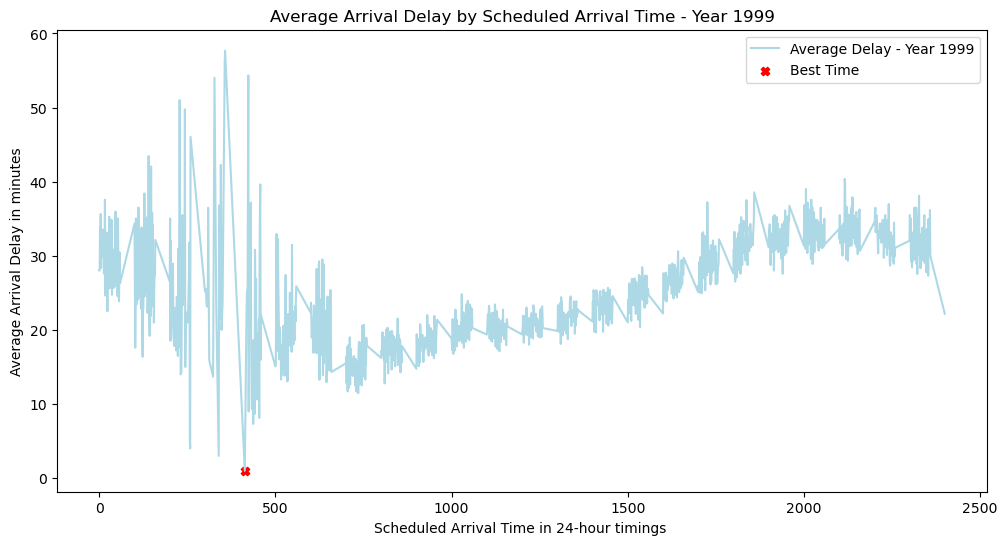

Best Times to Minimize Delays - Year 1999:
Year          1999.0
CRSArrTime     413.0
ArrDelay         1.0
Name: 181, dtype: float64


In [5]:
# Plotting best times for 1999

from matplotlib import rcParams # Package to help set parameters of the diagram

rcParams['figure.figsize'] = 12,6 # setting up the parameters, 12inch in length and 6inch in height

for year, group in best_times.groupby('Year'):
    best_time = group.loc[group['ArrDelay'].idxmin()] # a loop to reinforce the code while plotting 

# setting up the plot to show delays in scheduled times
plt.plot(combined_timings[combined_timings['Year'] == year]['CRSArrTime'], combined_timings[combined_timings['Year'] == year]['ArrDelay'],
             label=f'Average Delay - Year {year}', color='lightblue') # firstly, we filtered the combined_timings data to include the 'Year' column that matches with year; the variable. Then, the CRSDepTime is chosen so that the scheduled times are plotted in the diagram. The 2nd part filters the same as the 1st but now delay is chosen to be plotted. 
    # the year refers to the year that the df = pd.read.csv is reading. There is no need to input the actual year it will automatically be inputted 
    # the label is refering to the year the line plot is showing


# Adding a marker for easier visualisation of the point of lowest delay in the diagram    
plt.scatter(best_time['CRSArrTime'], best_time['ArrDelay'], color='red', marker='X', label='Best Time')
    
# Showing the full line plot
plt.xlabel('Scheduled Arrival Time in 24-hour timings ')
plt.ylabel('Average Arrival Delay in minutes')
plt.title(f'Average Arrival Delay by Scheduled Arrival Time - Year {year}')
plt.legend()
plt.show()

# Shows the values. i.e the best time to schedule a flight to minimise delays   
print(f"Best Times to Minimize Delays - Year {year}:")
print(best_time)

### We can observe that there are sudden spikes in the graph, hence to further clean up the data we will detect anomalies and remove it 

#### We set up an upper and lower limit for better line graph visualisation 
#### The multiplier 0.7 will be used to set the upper and lower limit. More specifically, 0.7 ensures that we can remove high delay values while making sure that the lower delay limit does not go over zero as we would be removing potential results that shows the lowest delay possible for the dataset

In [20]:
# Find / Setting the limtis 
upper_Delay_limit = delayed_flights['ArrDelay'].mean() + 0.7*delayed_flights['ArrDelay'].std()
lower_Delay_limit = delayed_flights['ArrDelay'].mean() - 0.7*delayed_flights['ArrDelay'].std()

print('upper_Delay_limit', upper_Delay_limit)
print('lower_Delay_limit', lower_Delay_limit)

upper_Delay_limit 53.93521908752204
lower_Delay_limit -1.9162958226083084


#### Based on our set upper and lower limits, we identify data that exceeds the limits and deem them as outliers 

In [21]:
# Identify the outliers
delayed_flights.loc[(delayed_flights['ArrDelay'] > upper_Delay_limit) | (delayed_flights['ArrDelay'] < lower_Delay_limit)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,1999,1,28,4,2016.0,1908,2126.0,2005,US,1244,...,19,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,1999,1,2,6,1651.0,1535,1829.0,1645,US,297,...,34,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,1999,1,6,3,1608.0,1535,1754.0,1645,US,297,...,45,5,0,NaN,0,NaN,NaN,NaN,NaN,NaN
21,1999,1,18,1,1649.0,1535,1815.0,1645,US,297,...,9,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
25,1999,1,22,5,1651.0,1535,1854.0,1645,US,297,...,7,24,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527732,1999,12,4,6,1724.0,1559,1917.0,1800,AA,1689,...,9,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5527777,1999,12,4,6,602.0,609,910.0,812,AA,1939,...,10,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5527808,1999,12,4,6,744.0,747,1157.0,954,AA,501,...,15,71,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5527839,1999,12,4,6,1355.0,1246,1625.0,1453,AA,809,...,5,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN


#### After identification, we proceed to removing these outliers from our dataset 

In [22]:
# Trimming -> deleting te outliers 
new_delayed_flights = delayed_flights.loc[(delayed_flights['ArrDelay'] <= upper_Delay_limit) & (delayed_flights['ArrDelay'] >= lower_Delay_limit)]

print ('outliers', len(delayed_flights) - len(new_delayed_flights)) # How many outliers were removed 

outliers 335112


#### We continue to identify potential NaN values in the new dataframe after removing the outliers 

In [23]:
# Finding if there are any NaN values in CRSArrtime column after removing the outliers 
NaN_values = new_delayed_flights['CRSArrTime'].isna().sum()
print("Number of NaN values in 'CRSArrTime' column:", NaN_values)

Number of NaN values in 'CRSArrTime' column: 0


#### SInce theres no NaN values, we can safely not repeat this line of code for the next 9 years 

## Plotting a graph of the cleaned dataframe for 1999

### Reapplying the general formula to the  new_delayed_flights 

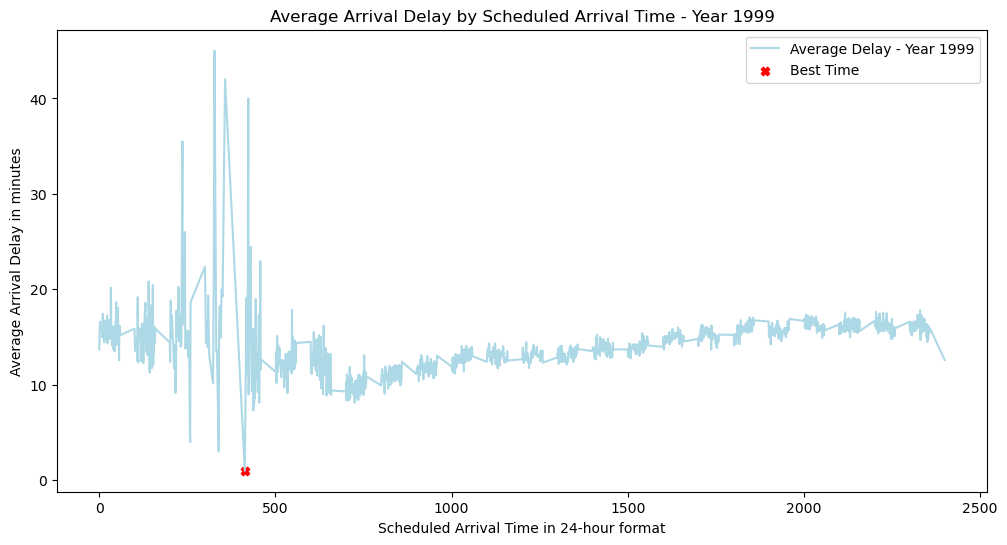

Best Times to Minimize Delays - Year 1999:
Year          1999.0
CRSArrTime     413.0
ArrDelay         1.0
Name: 180, dtype: float64


In [24]:
# Recalculate combined timings for the new DataFrame
combined_timings_new99 = new_delayed_flights.groupby(['Year', 'CRSArrTime']).agg({'ArrDelay': 'mean'}).reset_index()

# Recalculate best times for the new DataFrame
best_times_new99 = combined_timings_new99.loc[combined_timings_new99.groupby('Year')['ArrDelay'].idxmin()]

# Replotting the best times for 1999 

rcParams['figure.figsize'] = 12, 6

for year, group in best_times_new99.groupby('Year'):
    best_time_new99 = group.loc[group['ArrDelay'].idxmin()]
    
    plt.plot(combined_timings_new99[combined_timings_new99['Year'] == year]['CRSArrTime'], 
             combined_timings_new99[combined_timings_new99['Year'] == year]['ArrDelay'],
             label=f'Average Delay - Year {year}', color='lightblue')
    
    plt.scatter(best_time_new99['CRSArrTime'], best_time_new99['ArrDelay'], color='red', marker='X', label='Best Time')
    
    plt.xlabel('Scheduled Arrival Time in 24-hour format')
    plt.ylabel('Average Arrival Delay in minutes')
    plt.title(f'Average Arrival Delay by Scheduled Arrival Time - Year {year}')
    plt.legend()
    plt.show()

    print(f"Best Times to Minimize Delays - Year {year}:")
    print(best_time_new99)

#### It is oberservable that even after cleaning out, the graph still shows sudden spikes. But since the sudden spikes are more relevant in showing highest delays, we can safely ignore it. However, compared to the uncleaned df graph, we achievied a more reliable graph to show lowest delay. 
#### From the graph, we can also observe that after 1000 (10am) the graph is generally well distributed with little to no spikes in either higher or lower delays noticable and their average delays are generally between 10-20mins 

## Repeating these codes for the next 9 years of data but changing the year input and immediately dealing with the outliers. Hence, there will be no non cleaned graph and a only the final cleaned graph will be shown 

### 2000

upper_Delay_limit: 58.77737062217925
lower_Delay_limit: -0.8427247445629931
outliers 376529


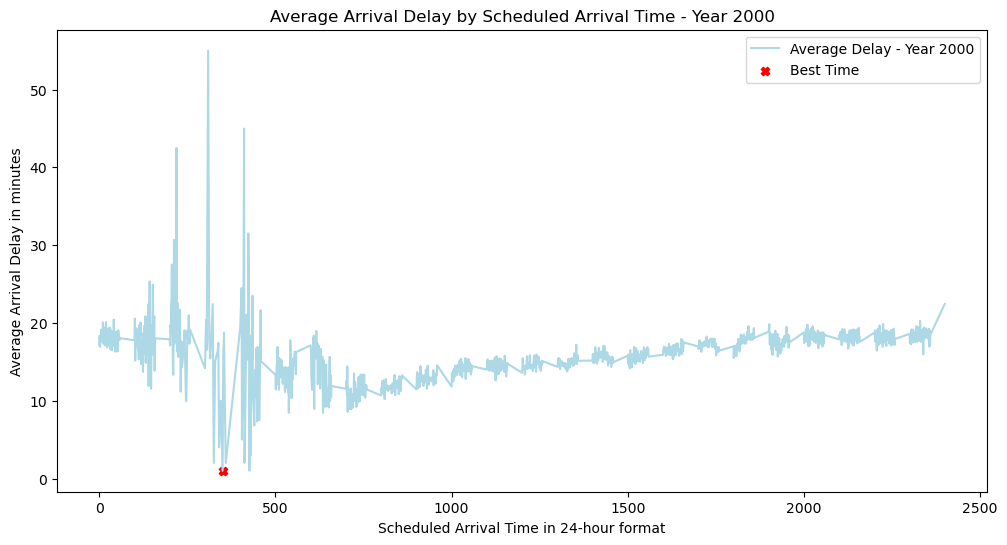

Best Times to Minimize Delays - Year 2000:
Year          2000.0
CRSArrTime     350.0
ArrDelay         1.0
Name: 178, dtype: float64


In [37]:
# the csv has alr been read

# Filtering out cancelled and diverted flights
df00 = df00[(df00['Diverted'] == 0) & (df00['Cancelled'] == 0)]

# Filter the DataFrame to include only delayed flights (ArrDelay > 0)
delayed_flights00 = df00[df00['ArrDelay'] > 0]

# Find the limits 
upper_Delay_limit = delayed_flights00['ArrDelay'].mean() + 0.7 * delayed_flights00['ArrDelay'].std()
lower_Delay_limit = delayed_flights00['ArrDelay'].mean() - 0.7 * delayed_flights00['ArrDelay'].std()

print('upper_Delay_limit:', upper_Delay_limit)
print('lower_Delay_limit:', lower_Delay_limit)

# Identify the outliers
outliers_delayed_flights00 = delayed_flights00.loc[(delayed_flights00['ArrDelay'] > upper_Delay_limit) | (delayed_flights00['ArrDelay'] < lower_Delay_limit)]

# Trimming -> deleting the outliers 
new_delayed_flights00 = delayed_flights00.loc[(delayed_flights00['ArrDelay'] <= upper_Delay_limit) & (delayed_flights00['ArrDelay'] >= lower_Delay_limit)]

print ('outliers', len(delayed_flights00) - len(new_delayed_flights00)) # How many outliers were removed 

# Recalculate combined timings for the new DataFrame
combined_timings_new00 = new_delayed_flights00.groupby(['Year', 'CRSArrTime']).agg({'ArrDelay': 'mean'}).reset_index()

# Recalculate best times for the new DataFrame
best_times_new00 = combined_timings_new00.loc[combined_timings_new00.groupby('Year')['ArrDelay'].idxmin()]

# Replotting the best times for 2000

rcParams['figure.figsize'] = 12, 6

for year, group in best_times_new00.groupby('Year'):
    best_time_new00 = group.loc[group['ArrDelay'].idxmin()]
    
    plt.plot(combined_timings_new00[combined_timings_new00['Year'] == year]['CRSArrTime'], 
             combined_timings_new00[combined_timings_new00['Year'] == year]['ArrDelay'],
             label=f'Average Delay - Year {year}', color='lightblue')
    
    plt.scatter(best_time_new00['CRSArrTime'], best_time_new00['ArrDelay'], color='red', marker='X', label='Best Time')
    
    plt.xlabel('Scheduled Arrival Time in 24-hour format')
    plt.ylabel('Average Arrival Delay in minutes')
    plt.title(f'Average Arrival Delay by Scheduled Arrival Time - Year {year}')
    plt.legend()
    plt.show()

    print(f"Best Times to Minimize Delays - Year {year}:")
    print(best_time_new00)

#### It is oberservable that even after cleaning out, the graph still shows sudden spikes. But since the sudden spikes are more relevant in showing highest delays, we can safely ignore it.
#### From the graph, the best time to minimise delay is 350 (3:50am) and it gives the lowest delay of 1 min
#### We can also observe that 1000 (10am) onwards, the graph is increasing steady will little to no spikes. 
#### The graph also shows that after 10am as the scheduled arrival time increases, the average arrival delay surpasses 20mins

### 2001

upper_Delay_limit: 53.11234237975021
lower_Delay_limit: -1.5568521337613177
outliers 311412


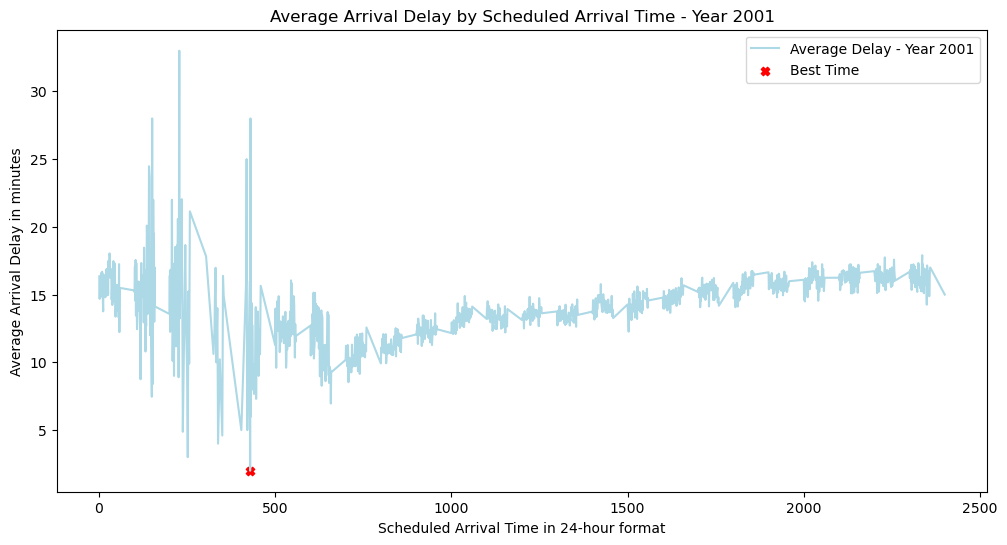

Best Times to Minimize Delays - Year 2001:
Year          2001.0
CRSArrTime     429.0
ArrDelay         2.0
Name: 173, dtype: float64


In [38]:
# the csv has alr been read

# Filtering out cancelled and diverted flights
df01 = df01[(df01['Diverted'] == 0) & (df01['Cancelled'] == 0)]

# Filter the DataFrame to include only delayed flights (ArrDelay > 0)
delayed_flights01 = df01[df01['ArrDelay'] > 0]

# Find the limits 
upper_Delay_limit = delayed_flights01['ArrDelay'].mean() + 0.7 * delayed_flights01['ArrDelay'].std()
lower_Delay_limit = delayed_flights01['ArrDelay'].mean() - 0.7 * delayed_flights01['ArrDelay'].std()

print('upper_Delay_limit:', upper_Delay_limit)
print('lower_Delay_limit:', lower_Delay_limit)

# Identify the outliers
outliers_delayed_flights01 = delayed_flights01.loc[(delayed_flights01['ArrDelay'] > upper_Delay_limit) | (delayed_flights01['ArrDelay'] < lower_Delay_limit)]

# Trimming -> deleting the outliers 
new_delayed_flights01 = delayed_flights01.loc[(delayed_flights01['ArrDelay'] <= upper_Delay_limit) & (delayed_flights01['ArrDelay'] >= lower_Delay_limit)]

print ('outliers', len(delayed_flights01) - len(new_delayed_flights01)) # How many outliers were removed 

# Recalculate combined timings for the new DataFrame
combined_timings_new01 = new_delayed_flights01.groupby(['Year', 'CRSArrTime']).agg({'ArrDelay': 'mean'}).reset_index()

# Recalculate best times for the new DataFrame
best_times_new01 = combined_timings_new01.loc[combined_timings_new01.groupby('Year')['ArrDelay'].idxmin()]

# Replotting the best times for 2001

rcParams['figure.figsize'] = 12, 6

for year, group in best_times_new01.groupby('Year'):
    best_time_new01 = group.loc[group['ArrDelay'].idxmin()]
    
    plt.plot(combined_timings_new01[combined_timings_new01['Year'] == year]['CRSArrTime'], 
             combined_timings_new01[combined_timings_new01['Year'] == year]['ArrDelay'],
             label=f'Average Delay - Year {year}', color='lightblue')
    
    plt.scatter(best_time_new01['CRSArrTime'], best_time_new01['ArrDelay'], color='red', marker='X', label='Best Time')
    
    plt.xlabel('Scheduled Arrival Time in 24-hour format')
    plt.ylabel('Average Arrival Delay in minutes')
    plt.title(f'Average Arrival Delay by Scheduled Arrival Time - Year {year}')
    plt.legend()
    plt.show()

    print(f"Best Times to Minimize Delays - Year {year}:")
    print(best_time_new01)

#### It is oberservable that even after cleaning out, the graph still shows sudden spikes. But since the sudden spikes that indicates higher delay are more rare, we can safely ignore it as an outlier. 
#### From the graph, the best timing to minimise delay is 429 (4:29am), giving the lowest delay of 2 minutes
#### We can observe that after 1000 (10am) the graph shows a steady increase in delays between 10-20mins range as the days timing progressed

### 2002

upper_Delay_limit: 50.23104995344623
lower_Delay_limit: -2.9587529364753493
outliers 236752


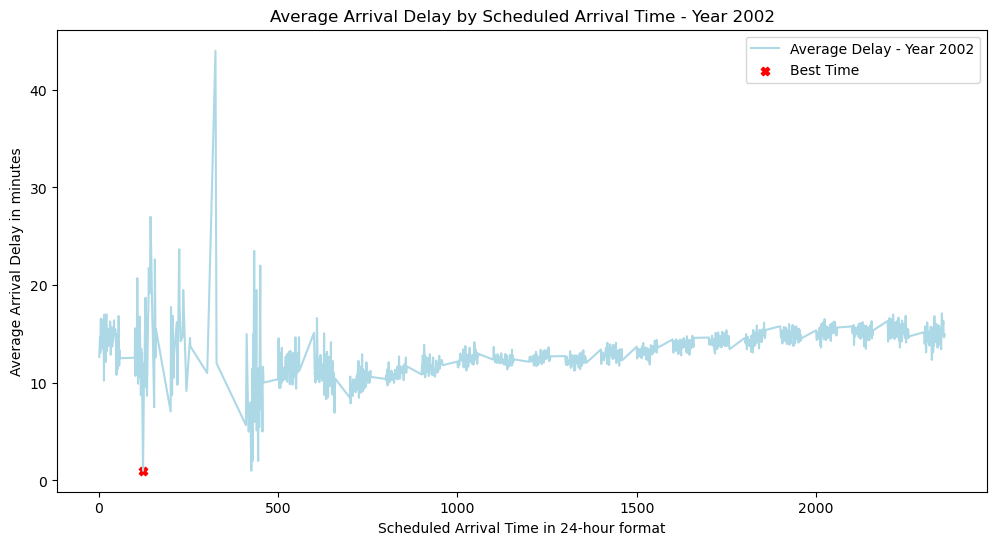

Best Times to Minimize Delays - Year 2002:
Year          2002.0
CRSArrTime     123.0
ArrDelay         1.0
Name: 81, dtype: float64


In [39]:
# the csv has alr been read

# Filtering out cancelled and diverted flights
df02 = df02[(df02['Diverted'] == 0) & (df02['Cancelled'] == 0)]

# Filter the DataFrame to include only delayed flights (ArrDelay > 0)
delayed_flights02 = df02[df02['ArrDelay'] > 0]

# Find the limits 
upper_Delay_limit = delayed_flights02['ArrDelay'].mean() + 0.7 * delayed_flights02['ArrDelay'].std()
lower_Delay_limit = delayed_flights02['ArrDelay'].mean() - 0.7 * delayed_flights02['ArrDelay'].std()

print('upper_Delay_limit:', upper_Delay_limit)
print('lower_Delay_limit:', lower_Delay_limit)

# Identify the outliers
outliers_delayed_flights02 = delayed_flights02.loc[(delayed_flights02['ArrDelay'] > upper_Delay_limit) | (delayed_flights02['ArrDelay'] < lower_Delay_limit)]

# Trimming -> deleting the outliers 
new_delayed_flights02 = delayed_flights02.loc[(delayed_flights02['ArrDelay'] <= upper_Delay_limit) & (delayed_flights02['ArrDelay'] >= lower_Delay_limit)]

print ('outliers', len(delayed_flights02) - len(new_delayed_flights02)) # How many outliers were removed 

# Recalculate combined timings for the new DataFrame
combined_timings_new02 = new_delayed_flights02.groupby(['Year', 'CRSArrTime']).agg({'ArrDelay': 'mean'}).reset_index()

# Recalculate best times for the new DataFrame
best_times_new02 = combined_timings_new02.loc[combined_timings_new02.groupby('Year')['ArrDelay'].idxmin()]

# Replotting the best times for 2002

rcParams['figure.figsize'] = 12, 6

for year, group in best_times_new02.groupby('Year'):
    best_time_new02 = group.loc[group['ArrDelay'].idxmin()]
    
    plt.plot(combined_timings_new02[combined_timings_new02['Year'] == year]['CRSArrTime'], 
             combined_timings_new02[combined_timings_new02['Year'] == year]['ArrDelay'],
             label=f'Average Delay - Year {year}', color='lightblue')
    
    plt.scatter(best_time_new02['CRSArrTime'], best_time_new02['ArrDelay'], color='red', marker='X', label='Best Time')
    
    plt.xlabel('Scheduled Arrival Time in 24-hour format')
    plt.ylabel('Average Arrival Delay in minutes')
    plt.title(f'Average Arrival Delay by Scheduled Arrival Time - Year {year}')
    plt.legend()
    plt.show()

    print(f"Best Times to Minimize Delays - Year {year}:")
    print(best_time_new02)

#### It is oberservable that even after cleaning out, the graph still shows sudden spikes. But since the sudden spikes only occurs once for higher delay we can safely ignore it. 
### From the graph, the best timing to minimise delay is 123 (1:23am). giving the lowest delay of 1 minute 
#### The graph shows that the flights generally share the same amount of average delay throughout the day with only the sudden spike in delay occuring near the 500 (5am) mark. 

### 2003

upper_Delay_limit: 52.62200346412473
lower_Delay_limit: -5.029872361693403
outliers 299313


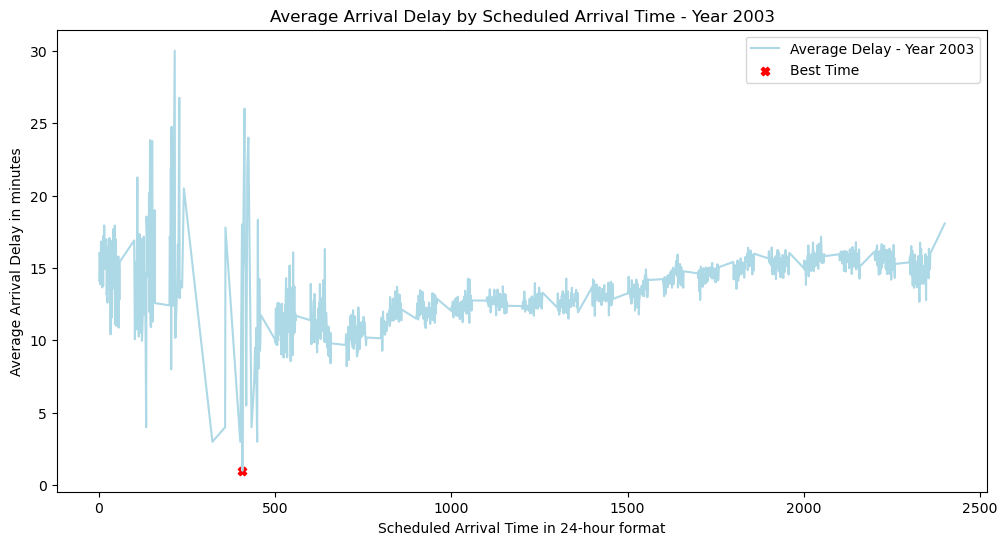

Best Times to Minimize Delays - Year 2003:
Year          2003.0
CRSArrTime     407.0
ArrDelay         1.0
Name: 133, dtype: float64


In [40]:
# the csv has alr been read

# Filtering out cancelled and diverted flights
df03 = df03[(df03['Diverted'] == 0) & (df03['Cancelled'] == 0)]

# Filter the DataFrame to include only delayed flights (ArrDelay > 0)
delayed_flights03 = df03[df03['ArrDelay'] > 0]

# Find the limits 
upper_Delay_limit = delayed_flights03['ArrDelay'].mean() + 0.7 * delayed_flights03['ArrDelay'].std()
lower_Delay_limit = delayed_flights03['ArrDelay'].mean() - 0.7 * delayed_flights00['ArrDelay'].std()

print('upper_Delay_limit:', upper_Delay_limit)
print('lower_Delay_limit:', lower_Delay_limit)

# Identify the outliers
outliers_delayed_flights03= delayed_flights03.loc[(delayed_flights03['ArrDelay'] > upper_Delay_limit) | (delayed_flights03['ArrDelay'] < lower_Delay_limit)]

# Trimming -> deleting the outliers 
new_delayed_flights03 = delayed_flights03.loc[(delayed_flights03['ArrDelay'] <= upper_Delay_limit) & (delayed_flights03['ArrDelay'] >= lower_Delay_limit)]

print ('outliers', len(delayed_flights03) - len(new_delayed_flights03)) # How many outliers were removed 

# Recalculate combined timings for the new DataFrame
combined_timings_new03 = new_delayed_flights03.groupby(['Year', 'CRSArrTime']).agg({'ArrDelay': 'mean'}).reset_index()

# Recalculate best times for the new DataFrame
best_times_new03 = combined_timings_new03.loc[combined_timings_new03.groupby('Year')['ArrDelay'].idxmin()]

# Replotting the best times for 2003

rcParams['figure.figsize'] = 12, 6

for year, group in best_times_new03.groupby('Year'):
    best_time_new03 = group.loc[group['ArrDelay'].idxmin()]
    
    plt.plot(combined_timings_new03[combined_timings_new03['Year'] == year]['CRSArrTime'], 
             combined_timings_new03[combined_timings_new03['Year'] == year]['ArrDelay'],
             label=f'Average Delay - Year {year}', color='lightblue')
    
    plt.scatter(best_time_new03['CRSArrTime'], best_time_new03['ArrDelay'], color='red', marker='X', label='Best Time')
    
    plt.xlabel('Scheduled Arrival Time in 24-hour format')
    plt.ylabel('Average Arrival Delay in minutes')
    plt.title(f'Average Arrival Delay by Scheduled Arrival Time - Year {year}')
    plt.legend()
    plt.show()

    print(f"Best Times to Minimize Delays - Year {year}:")
    print(best_time_new03)

#### It is oberservable that even after cleaning out, the graph still shows sudden spikes. But since the sudden spikes that indicates higher delay are more rare, we can safely ignore it as an outlier.
#### From the graph, the best timings to minimise delays is 407 (4:07am), giving the lowest delay of 1 minute
#### From the graph, we can observe that after 1000 (10am) the graph has a relatively steady increase of delay

### 2004

upper_Delay_limit: 56.57457706194606
lower_Delay_limit: -1.3444325039257343
outliers 400302


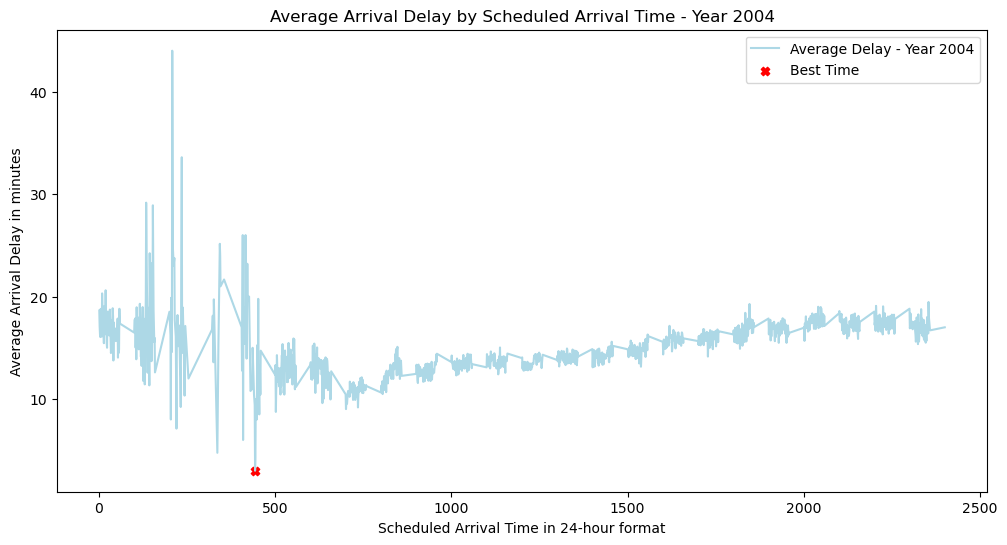

Best Times to Minimize Delays - Year 2004:
Year          2004.0
CRSArrTime     443.0
ArrDelay         3.0
Name: 166, dtype: float64


In [41]:
# the csv has alr been read

# Filtering out cancelled and diverted flights
df04 = df04[(df04['Diverted'] == 0) & (df04['Cancelled'] == 0)]

# Filter the DataFrame to include only delayed flights (ArrDelay > 0)
delayed_flights04 = df04[df04['ArrDelay'] > 0]

# Find the limits 
upper_Delay_limit = delayed_flights04['ArrDelay'].mean() + 0.7 * delayed_flights04['ArrDelay'].std()
lower_Delay_limit = delayed_flights04['ArrDelay'].mean() - 0.7 * delayed_flights04['ArrDelay'].std()

print('upper_Delay_limit:', upper_Delay_limit)
print('lower_Delay_limit:', lower_Delay_limit)

# Identify the outliers
outliers_delayed_flights04 = delayed_flights04.loc[(delayed_flights04['ArrDelay'] > upper_Delay_limit) | (delayed_flights04['ArrDelay'] < lower_Delay_limit)]

# Trimming -> deleting the outliers 
new_delayed_flights04 = delayed_flights04.loc[(delayed_flights04['ArrDelay'] <= upper_Delay_limit) & (delayed_flights04['ArrDelay'] >= lower_Delay_limit)]

print ('outliers', len(delayed_flights04) - len(new_delayed_flights04)) # How many outliers were removed 

# Recalculate combined timings for the new DataFrame
combined_timings_new04 = new_delayed_flights04.groupby(['Year', 'CRSArrTime']).agg({'ArrDelay': 'mean'}).reset_index()

# Recalculate best times for the new DataFrame
best_times_new04 = combined_timings_new04.loc[combined_timings_new04.groupby('Year')['ArrDelay'].idxmin()]

# Replotting the best times for 2004

rcParams['figure.figsize'] = 12, 6

for year, group in best_times_new04.groupby('Year'):
    best_time_new04 = group.loc[group['ArrDelay'].idxmin()]

    plt.plot(combined_timings_new04[combined_timings_new04['Year'] == year]['CRSArrTime'], 
             combined_timings_new04[combined_timings_new04['Year'] == year]['ArrDelay'],
             label=f'Average Delay - Year {year}', color='lightblue')
    
    plt.scatter(best_time_new04['CRSArrTime'], best_time_new04['ArrDelay'], color='red', marker='X', label='Best Time')
    
    plt.xlabel('Scheduled Arrival Time in 24-hour format')
    plt.ylabel('Average Arrival Delay in minutes')
    plt.title(f'Average Arrival Delay by Scheduled Arrival Time - Year {year}')
    plt.legend()
    plt.show()

    print(f"Best Times to Minimize Delays - Year {year}:")
    print(best_time_new04)

#### It is oberservable that even after cleaning out, the graph still shows sudden spikes. But since the sudden spikes that indicates higher delay are more rare, we can safely ignore it as an outlier.
#### From the graph, the best timings to minimsie delays is 443 ( 4:43am), giving the lowest delay of 3 minutes 
#### From the graph, we can observe that after 500 (5am) the graph stays relatively constant or experiences little steady increases over time 

### 2005

upper_Delay_limit: 58.10190573612209
lower_Delay_limit: -1.459786425148227
outliers 403282


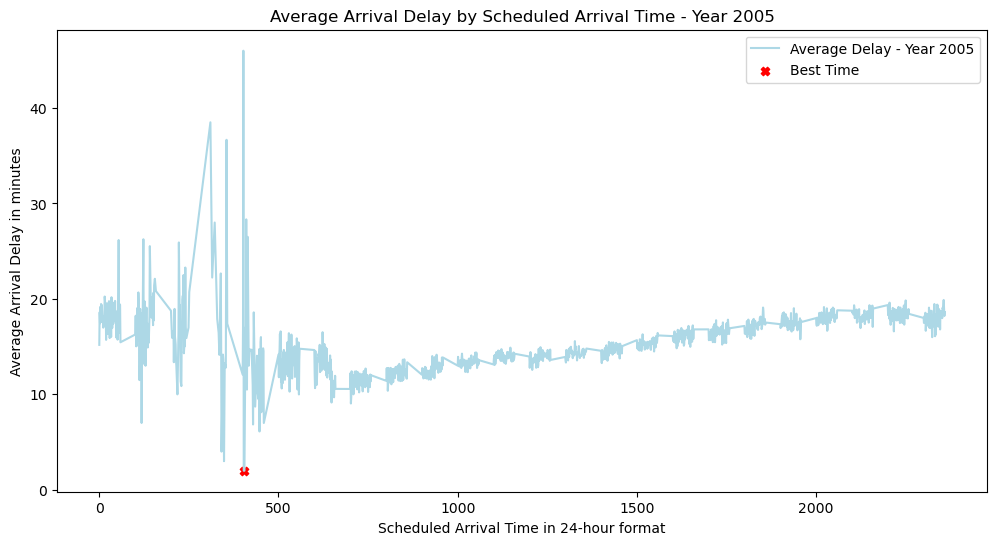

Best Times to Minimize Delays - Year 2005:
Year          2005.0
CRSArrTime     403.0
ArrDelay         2.0
Name: 160, dtype: float64


In [42]:
# the csv has alr been read

# Filtering out cancelled and diverted flights
df05 = df05[(df05['Diverted'] == 0) & (df05['Cancelled'] == 0)]

# Filter the DataFrame to include only delayed flights (ArrDelay > 0)
delayed_flights05 = df05[df05['ArrDelay'] > 0]

# Find the limits 
upper_Delay_limit = delayed_flights05['ArrDelay'].mean() + 0.7 * delayed_flights05['ArrDelay'].std()
lower_Delay_limit = delayed_flights05['ArrDelay'].mean() - 0.7 * delayed_flights05['ArrDelay'].std()

print('upper_Delay_limit:', upper_Delay_limit)
print('lower_Delay_limit:', lower_Delay_limit)

# Identify the outliers
outliers_delayed_flights05 = delayed_flights05.loc[(delayed_flights05['ArrDelay'] > upper_Delay_limit) | (delayed_flights05['ArrDelay'] < lower_Delay_limit)]

# Trimming -> deleting the outliers 
new_delayed_flights05 = delayed_flights05.loc[(delayed_flights05['ArrDelay'] <= upper_Delay_limit) & (delayed_flights05['ArrDelay'] >= lower_Delay_limit)]

print ('outliers', len(delayed_flights05) - len(new_delayed_flights05)) # How many outliers were removed 

# Recalculate combined timings for the new DataFrame
combined_timings_new05 = new_delayed_flights05.groupby(['Year', 'CRSArrTime']).agg({'ArrDelay': 'mean'}).reset_index()

# Recalculate best times for the new DataFrame
best_times_new05 = combined_timings_new05.loc[combined_timings_new05.groupby('Year')['ArrDelay'].idxmin()]

# Replotting the best times for 2005

rcParams['figure.figsize'] = 12, 6

for year, group in best_times_new05.groupby('Year'):
    best_time_new05 = group.loc[group['ArrDelay'].idxmin()]
    
    plt.plot(combined_timings_new05[combined_timings_new05['Year'] == year]['CRSArrTime'], 
             combined_timings_new05[combined_timings_new05['Year'] == year]['ArrDelay'],
             label=f'Average Delay - Year {year}', color='lightblue')
    
    plt.scatter(best_time_new05['CRSArrTime'], best_time_new05['ArrDelay'], color='red', marker='X', label='Best Time')
    
    plt.xlabel('Scheduled Arrival Time in 24-hour format')
    plt.ylabel('Average Arrival Delay in minutes')
    plt.title(f'Average Arrival Delay by Scheduled Arrival Time - Year {year}')
    plt.legend()
    plt.show()

    print(f"Best Times to Minimize Delays - Year {year}:")
    print(best_time_new05)

#### It is oberservable that even after cleaning out, the graph still shows sudden spikes. But since the sudden spikes that indicates higher delay are more rare, we can safely ignore it as an outlier.
#### From the graph, the best timings to minimise delay is 403 (4:03am), giving the lowest delay of 2 minutes
#### From the graph, we can observe that after 1000 (10am) the graph stays relatively constant with a steady increase

### 2006

upper_Delay_limit: 61.7115246196103
lower_Delay_limit: -0.8109151804657024
outliers 437823


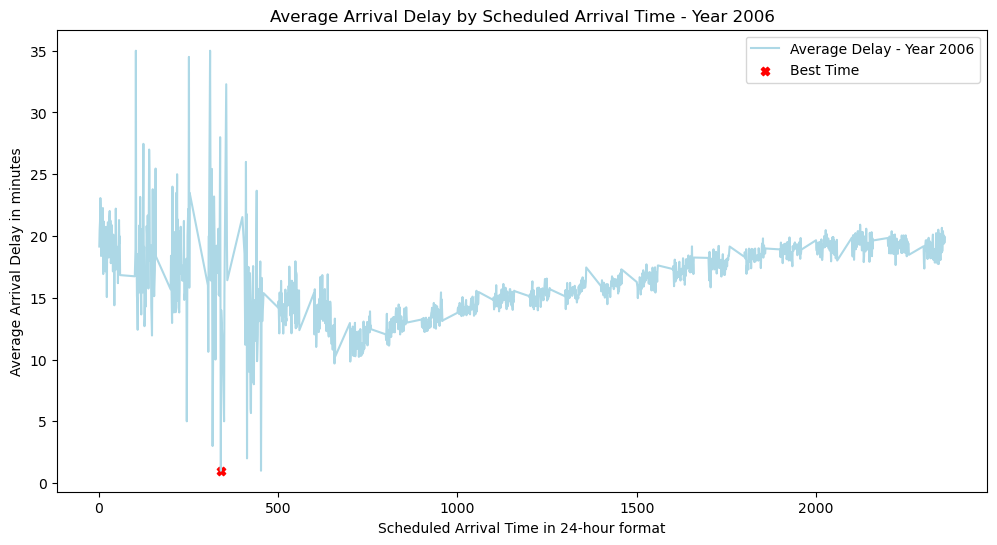

Best Times to Minimize Delays - Year 2006:
Year          2006.0
CRSArrTime     340.0
ArrDelay         1.0
Name: 175, dtype: float64


In [43]:
# the csv has alr been read

# Filtering out cancelled and diverted flights
df06 = df06[(df06['Diverted'] == 0) & (df06['Cancelled'] == 0)]

# Filter the DataFrame to include only delayed flights (ArrDelay > 0)
delayed_flights06 = df06[df06['ArrDelay'] > 0]

# Find the limits 
upper_Delay_limit = delayed_flights06['ArrDelay'].mean() + 0.7 * delayed_flights06['ArrDelay'].std()
lower_Delay_limit = delayed_flights06['ArrDelay'].mean() - 0.7 * delayed_flights06['ArrDelay'].std()

print('upper_Delay_limit:', upper_Delay_limit)
print('lower_Delay_limit:', lower_Delay_limit)

# Identify the outliers
outliers_delayed_flights06 = delayed_flights06.loc[(delayed_flights06['ArrDelay'] > upper_Delay_limit) | (delayed_flights06['ArrDelay'] < lower_Delay_limit)]

# Trimming -> deleting the outliers 
new_delayed_flights06 = delayed_flights06.loc[(delayed_flights06['ArrDelay'] <= upper_Delay_limit) & (delayed_flights06['ArrDelay'] >= lower_Delay_limit)]

print ('outliers', len(delayed_flights06) - len(new_delayed_flights06)) # How many outliers were removed 

# Recalculate combined timings for the new DataFrame
combined_timings_new06 = new_delayed_flights06.groupby(['Year', 'CRSArrTime']).agg({'ArrDelay': 'mean'}).reset_index()

# Recalculate best times for the new DataFrame
best_times_new06 = combined_timings_new06.loc[combined_timings_new06.groupby('Year')['ArrDelay'].idxmin()]

# Replotting the best times for 2006

rcParams['figure.figsize'] = 12, 6

for year, group in best_times_new06.groupby('Year'):
    best_time_new06 = group.loc[group['ArrDelay'].idxmin()]
    
    plt.plot(combined_timings_new06[combined_timings_new06['Year'] == year]['CRSArrTime'], 
             combined_timings_new06[combined_timings_new06['Year'] == year]['ArrDelay'],
             label=f'Average Delay - Year {year}', color='lightblue')
    
    plt.scatter(best_time_new06['CRSArrTime'], best_time_new06['ArrDelay'], color='red', marker='X', label='Best Time')
    
    plt.xlabel('Scheduled Arrival Time in 24-hour format')
    plt.ylabel('Average Arrival Delay in minutes')
    plt.title(f'Average Arrival Delay by Scheduled Arrival Time - Year {year}')
    plt.legend()
    plt.show()

    print(f"Best Times to Minimize Delays - Year {year}:")
    print(best_time_new06)

#### It is oberservable that even after cleaning out, the graph still shows sudden spikes. But since the sudden spikes that indicates higher delay are more rare, we can safely ignore it as an outlier
#### From the graph, the best timings to minimise delay is 340 (3:40am), giving the lowest delay of 1 minute
#### From the graph, we can observe that after 1000 (10am) the graph has a constant steady increase 

### 2007

upper_Delay_limit: 65.59733505567556
lower_Delay_limit: -1.034014554901681
outliers 475276


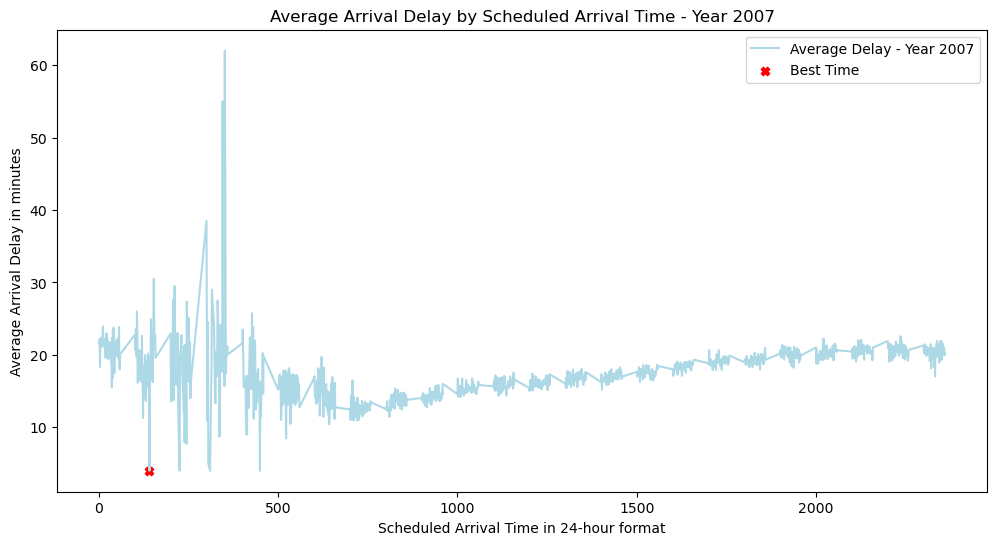

Best Times to Minimize Delays - Year 2007:
Year          2007.0
CRSArrTime     141.0
ArrDelay         4.0
Name: 100, dtype: float64


In [44]:
# the csv has alr been read

# Filtering out cancelled and diverted flights
df07 = df07[(df07['Diverted'] == 0) & (df07['Cancelled'] == 0)]

# Filter the DataFrame to include only delayed flights (ArrDelay > 0)
delayed_flights07 = df07[df07['ArrDelay'] > 0]

# Find the limits 
upper_Delay_limit = delayed_flights07['ArrDelay'].mean() + 0.7 * delayed_flights07['ArrDelay'].std()
lower_Delay_limit = delayed_flights07['ArrDelay'].mean() - 0.7 * delayed_flights07['ArrDelay'].std()

print('upper_Delay_limit:', upper_Delay_limit)
print('lower_Delay_limit:', lower_Delay_limit)

# Identify the outliers
outliers_delayed_flights07 = delayed_flights07.loc[(delayed_flights07['ArrDelay'] > upper_Delay_limit) | (delayed_flights07['ArrDelay'] < lower_Delay_limit)]

# Trimming -> deleting the outliers 
new_delayed_flights07 = delayed_flights07.loc[(delayed_flights07['ArrDelay'] <= upper_Delay_limit) & (delayed_flights07['ArrDelay'] >= lower_Delay_limit)]

print ('outliers', len(delayed_flights07) - len(new_delayed_flights07)) # How many outliers were removed 

# Recalculate combined timings for the new DataFrame
combined_timings_new07 = new_delayed_flights07.groupby(['Year', 'CRSArrTime']).agg({'ArrDelay': 'mean'}).reset_index()

# Recalculate best times for the new DataFrame
best_times_new07 = combined_timings_new07.loc[combined_timings_new07.groupby('Year')['ArrDelay'].idxmin()]

# Replotting the best times for 2007

rcParams['figure.figsize'] = 12, 6

for year, group in best_times_new07.groupby('Year'):
    best_time_new07 = group.loc[group['ArrDelay'].idxmin()]
    
    plt.plot(combined_timings_new07[combined_timings_new07['Year'] == year]['CRSArrTime'], 
             combined_timings_new07[combined_timings_new07['Year'] == year]['ArrDelay'],
             label=f'Average Delay - Year {year}', color='lightblue')
    
    plt.scatter(best_time_new07['CRSArrTime'], best_time_new07['ArrDelay'], color='red', marker='X', label='Best Time')
    
    plt.xlabel('Scheduled Arrival Time in 24-hour format')
    plt.ylabel('Average Arrival Delay in minutes')
    plt.title(f'Average Arrival Delay by Scheduled Arrival Time - Year {year}')
    plt.legend()
    plt.show()

    print(f"Best Times to Minimize Delays - Year {year}:")
    print(best_time_new07)

#### It is oberservable that even after cleaning out, the graph still shows sudden spikes. But since the sudden spikes that indicates higher delay are more rare, we can safely ignore it as an outlier.
#### From the graph, the best timings to minimise delay is 141 (1:41am), giving the lowest delay of 4 minutes 
#### From the graph, we can observe that after 1000 (10am) the graph stays relatively constant with steady increases
#### The graph also shows that the flights in 2007 generally have a lower amount of delay times

### 2008

upper_Delay_limit: 65.88808370130377
lower_Delay_limit: -0.846783534581057
outliers 153209


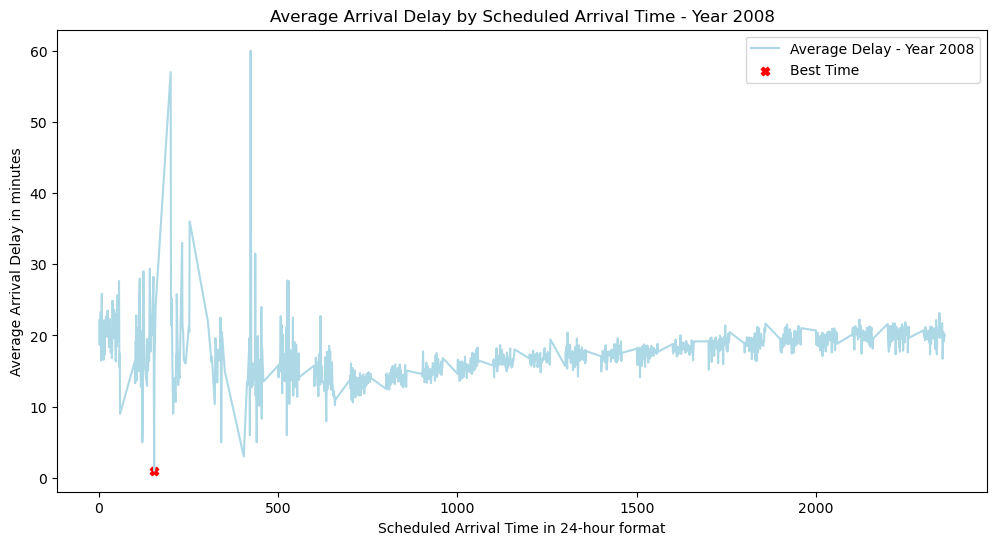

Best Times to Minimize Delays - Year 2008:
Year          2008.0
CRSArrTime     154.0
ArrDelay         1.0
Name: 96, dtype: float64


In [45]:
# the csv has alr been read

# Filtering out cancelled and diverted flights
df08 = df08[(df08['Diverted'] == 0) & (df08['Cancelled'] == 0)]

# Filter the DataFrame to include only delayed flights (ArrDelay > 0)
delayed_flights08 = df08[df08['ArrDelay'] > 0]

# Find the limits 
upper_Delay_limit = delayed_flights08['ArrDelay'].mean() + 0.7 * delayed_flights08['ArrDelay'].std()
lower_Delay_limit = delayed_flights08['ArrDelay'].mean() - 0.7 * delayed_flights08['ArrDelay'].std()

print('upper_Delay_limit:', upper_Delay_limit)
print('lower_Delay_limit:', lower_Delay_limit)

# Identify the outliers
outliers_delayed_flights08 = delayed_flights08.loc[(delayed_flights08['ArrDelay'] > upper_Delay_limit) | (delayed_flights08['ArrDelay'] < lower_Delay_limit)]

# Trimming -> deleting the outliers 
new_delayed_flights08 = delayed_flights08.loc[(delayed_flights08['ArrDelay'] <= upper_Delay_limit) & (delayed_flights08['ArrDelay'] >= lower_Delay_limit)]

print ('outliers', len(delayed_flights08) - len(new_delayed_flights08)) # How many outliers were removed 

# Recalculate combined timings for the new DataFrame
combined_timings_new08 = new_delayed_flights08.groupby(['Year', 'CRSArrTime']).agg({'ArrDelay': 'mean'}).reset_index()

# Recalculate best times for the new DataFrame
best_times_new08 = combined_timings_new08.loc[combined_timings_new08.groupby('Year')['ArrDelay'].idxmin()]

# Replotting the best times for 2008

rcParams['figure.figsize'] = 12, 6

for year, group in best_times_new08.groupby('Year'):
    best_time_new08 = group.loc[group['ArrDelay'].idxmin()]
    
    plt.plot(combined_timings_new08[combined_timings_new08['Year'] == year]['CRSArrTime'], 
             combined_timings_new08[combined_timings_new08['Year'] == year]['ArrDelay'],
             label=f'Average Delay - Year {year}', color='lightblue')
    
    plt.scatter(best_time_new08['CRSArrTime'], best_time_new08['ArrDelay'], color='red', marker='X', label='Best Time')
    
    plt.xlabel('Scheduled Arrival Time in 24-hour format')
    plt.ylabel('Average Arrival Delay in minutes')
    plt.title(f'Average Arrival Delay by Scheduled Arrival Time - Year {year}')
    plt.legend()
    plt.show()

    print(f"Best Times to Minimize Delays - Year {year}:")
    print(best_time_new08)

#### It is oberservable that even after cleaning out, the graph still shows sudden spikes. But since the sudden spikes that indicates higher delay are more rare, we can safely ignore it as an outlier.
#### From the graph, the best timings to minimise delay is 154 (1:54am), giving the lowest delay of 1 minutes 
#### From the graph, we can observe that after 1000 (10am) the graph stays relatively constant with steady increase

## Condensing 10 years of data into a diagram

#### We filter away diverted and cancelled flights while only be looking at the ArrDelay and CRSArrTime columns. At this stage the dfs_total are a list
#### We then combine all the 10 years filtered data into one dataframe named df_combined

In [4]:
# List of DataFrames with only specified columns and filtered for non-diverted and non-cancelled flights
dfs_total = [
    df99[(df99['Diverted'] == 0) & (df99['Cancelled'] == 0)][['ArrDelay','Year', 'CRSArrTime']],
    df00[(df00['Diverted'] == 0) & (df00['Cancelled'] == 0)][['ArrDelay','Year', 'CRSArrTime']],
    df01[(df01['Diverted'] == 0) & (df01['Cancelled'] == 0)][['ArrDelay','Year', 'CRSArrTime']],
    df02[(df02['Diverted'] == 0) & (df02['Cancelled'] == 0)][['ArrDelay','Year', 'CRSArrTime']],
    df03[(df03['Diverted'] == 0) & (df03['Cancelled'] == 0)][['ArrDelay','Year', 'CRSArrTime']],
    df04[(df04['Diverted'] == 0) & (df04['Cancelled'] == 0)][['ArrDelay','Year', 'CRSArrTime']],
    df05[(df05['Diverted'] == 0) & (df05['Cancelled'] == 0)][['ArrDelay','Year', 'CRSArrTime']],
    df06[(df06['Diverted'] == 0) & (df06['Cancelled'] == 0)][['ArrDelay','Year', 'CRSArrTime']],
    df07[(df07['Diverted'] == 0) & (df07['Cancelled'] == 0)][['ArrDelay','Year', 'CRSArrTime']],
    df08[(df08['Diverted'] == 0) & (df08['Cancelled'] == 0)][['ArrDelay','Year', 'CRSArrTime']]
]

# Combine all dataframes into one
df_combined = pd.concat(dfs_total)

### We can ignore anomalies in this section to show full results since it will be represented / visualised in a bar graph format 

#### We will categorise the timings into different parts of the day. The timings are categorised using the 24hr format, according to how CRSArrTime data is inputted. This is done via making a categorise_time function and separating the different timings on the day into its relevant categories 
#### We then apply the categorise_time function into the CRSArrTime column to categorise the timings in there to the different parts of the day 
#### A new column named ArrivalTimeInterval is created storing the named categories of the CRSArrTime column for easier comparison 
#### At the end we print out the df_combined dataframe to ensure the CRSArrTimeInterval has been properly implemented 

In [8]:
def categorise_time(i): 
    if i >= 0 and i <=600: return 'night'
    if i > 600 and i <=1200: return 'morning'
    if i > 1200 and i <=1800: return 'afternoon'
    if i > 1800 and i <=2400: return 'evening'
    else: return 'other'
    
df_combined['ArrivalTimeInterval'] = df_combined['CRSArrTime'].apply(categorise_time)

print(df_combined)

         ArrDelay  Year  CRSArrTime ArrivalTimeInterval
0            19.0  1999        2005             evening
1            81.0  1999        2005             evening
2            -5.0  1999        2005             evening
3            26.0  1999        2005             evening
4            22.0  1999        1645           afternoon
...           ...   ...         ...                 ...
2389212      -3.0  2008        1237           afternoon
2389213       3.0  2008        1524           afternoon
2389214       3.0  2008        1553           afternoon
2389215      -1.0  2008        2141             evening
2389216      -2.0  2008         754             morning

[58717322 rows x 4 columns]


#### We create a new dataframe called Time_Interval_data that consist of the grouped ArrivalTimeInterval column, total number of flights, total sum of ArrDelay, Number of delayed flights and the percentage of delayed flights 

#### For the 10 years condensed data, we proceed to also ensure the delays are  > 0

#### To ensure easier readability of the dataframe, we made sure that when the Time_Interval_data is printed, the ArrivalTImeInterval categories are listed in the correct order of how the day progresses

In [10]:
# Group by 'ArrivalTimeInterval' and calculate relevant statistics
Time_Interval_data = df_combined.groupby('ArrivalTimeInterval').agg(
    Flights=('ArrDelay', 'count'),
    Total_Arr_Delay=('ArrDelay', 'sum'),
    Delays=('ArrDelay', lambda x: (x > 0).sum()),
    Delayed_percent=('ArrDelay', lambda x: (x > 0).mean() * 100)
).reset_index()

# Renaming the 'ArrivalTimeInterval' values for ordering
Time_Interval_data['ArrivalTimeInterval'] = pd.Categorical(
    Time_Interval_data['ArrivalTimeInterval'], 
    categories=['night', 'morning', 'afternoon', 'evening', 'other'], 
    ordered=True
)

# Sort the DataFrame based on the 'ArrivalTimeInterval' order
Time_Interval_data = Time_Interval_data.sort_values(by='ArrivalTimeInterval')

# Print the resulting DataFrame
print(Time_Interval_data)

  ArrivalTimeInterval   Flights  Total_Arr_Delay   Delays  Delayed_percent
3               night   1188944        8472253.0   533742        44.892106
2             morning  16225383       30162219.0  6001848        36.990486
0           afternoon  22202648      149552851.0  9933513        44.740217
1             evening  19100346      239064764.0  9655931        50.553694


#### We now plot the bar graph to showing the percentage of delayed flights across the different time interval / categories. The percentage of delayed flights consisits of 10 years worth of data condensed into 1. 

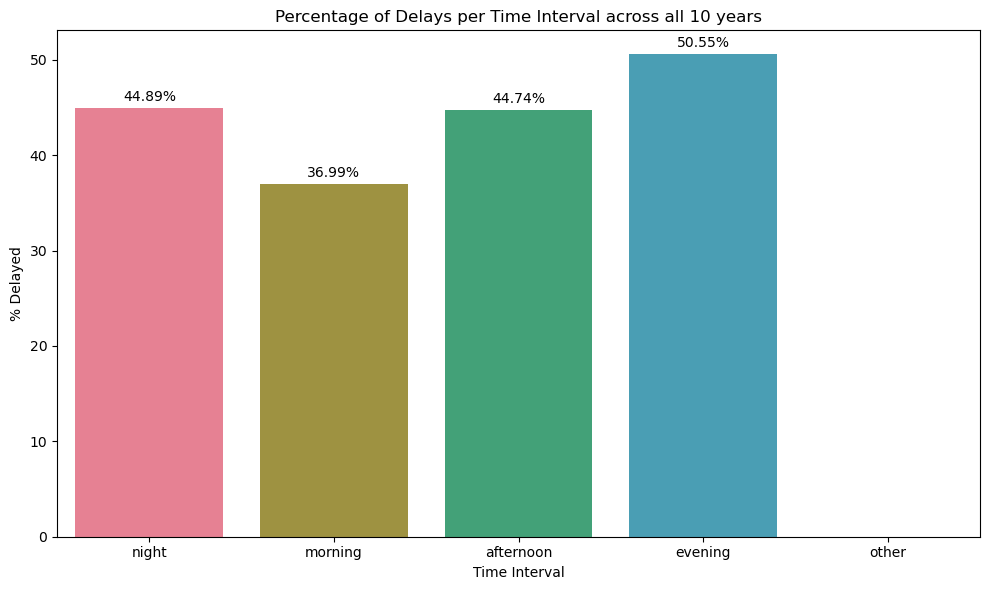

In [19]:
# Plotting the graph 
import seaborn as sns
rcParams['figure.figsize'] = 10,6

bars = sns.barplot(data=Time_Interval_data, x='ArrivalTimeInterval', y='Delayed_percent', palette='husl')

# Add percentage numbers on top of each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f') + '%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# Add labels and title
plt.xlabel('Time Interval')
plt.ylabel('% Delayed')
plt.title('Percentage of Delays per Time Interval across all 10 years')

# Show plot
plt.tight_layout()  # Adjust layout 
plt.show()

#### From the graph, it shows that morning time experiences lower % of delays, However, from individual years, the best timings to minimise delays occurs during the night time. Hence, there might be another underlying reason for such results to be shown

## Finding best days of the week to minimise delays

### General formula with step by step explanation using 1999 as the template

#### For best days, we do not need to disect each variable for comparison. Instead we look which day of the week is best to minimise delays; the delay in this case is adding the DepDelay and ArrDelay together 

#### After reading the year csv, we filter away the diverted and cancelled flights (ie. keeping Diverted ==0 and Cancelled ==0) , there is no need to additionally filter columns that we want 

#### We map out the days of the week and apply numbering to it (ie 1: Monday ....) so that we can apply actual days into the DayOfWeek column as that column only has values between 1-7 inputed

#### We then creat a day_mean dataset that consist of DayOfWeek and the mean of DepDelay and mean of ArrDelay

#### We proceed to add these 2 delays into 1 delay and find the mean of the 2 to get the Avg_delay column and then we find the best day by finding which day has the lowest Avg_delay

#### We have to read the csv again without the labelling the df as the best times i.e df99. We also cannot label things like day_mean as day_mean99. If not both types of labelling results in an empty data 

In [48]:
# the csv has been read

# filtering out cancelled and diverted flights i.e Diverted ==1 and Cancelled ==1 
df = df99[(df99['Diverted'] == 0) & (df99['Cancelled'] == 0)]

# Mapping out all days of the week
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'} # the _mapping acts like a dictionary to map out the individual representation that are the days of the week to their corresponding allocated numbers 

# Map day numbers to day names
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping) # We look into the DayOfWeek column in the csv file and use the .map() to apply / insert the day_mapping code into the DayOfWeek collumn. This replaces the objects in the original DayOfWeek column that has the numerical representation of the days with the actual names due to the day_mapping 

# Filter the DataFrame to include only delayed flights (ArrDelay and DepDelay > 0)
df = df[(df['ArrDelay'] > 0) & (df['DepDelay'] > 0)]


# Group by day of the week and calculate mean delay
day_mean = df.groupby('DayOfWeek').agg({'DepDelay': 'mean', 'ArrDelay': 'mean'}) # use .groupby to group the DayOfWeek into the new day_mean dataframe. .agg() is used to further filter / specify that we want DepDelay and ArrDelay. We then proceed to find the mean of each type of delay individually

# Calculate average delay
day_mean['Avg_delay'] = (day_mean['DepDelay'] + day_mean['ArrDelay']) / 2  # from the previous code we got 2 means for 2 different delay, as such we now then calculate the average delay of the 2 different types of delay

# Find the best day with the lowest average delay
best_day = day_mean['Avg_delay'].idxmin()  # .idxmin() helps to identify the day that has the lowest average delay

#### Plotting a bar graph to show a easy visual representation of the Avg_delays per day. There is also a red circle as a marker to immediately make it clear which day is the best day to minimise delay

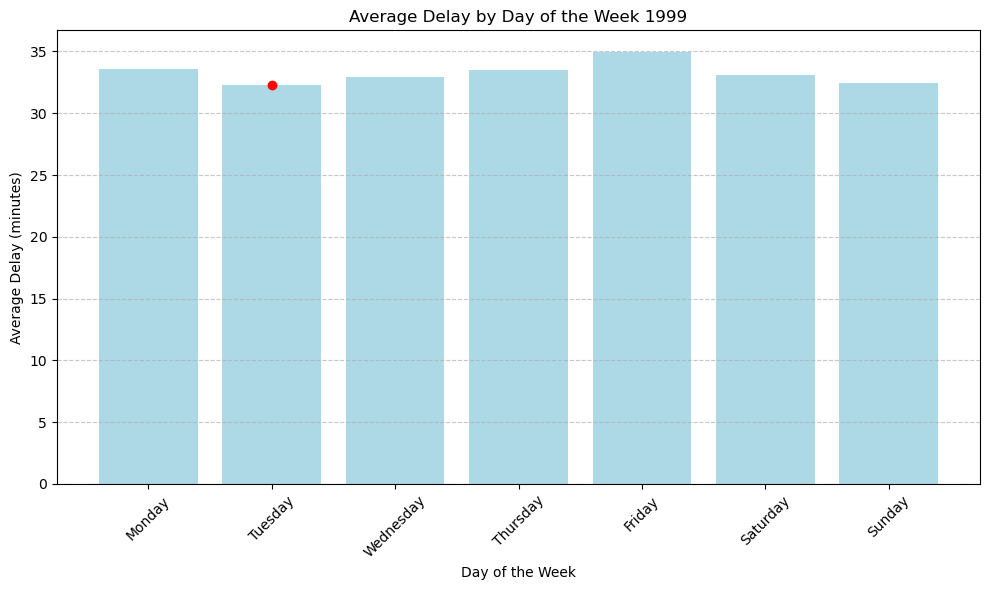

Tuesday 32.30544475328462


In [49]:
# Plotting a bar graph 

# Reordering the DayOfWeek column to make sure its in the correct order of days in a week so that the graph exhibits the correct order as well 
day_mean = day_mean.reindex(day_mapping.values()) 

# Setting the size of the graph 

rcParams['figure.figsize'] = 10,6

# plotting the full bar graph 
plt.bar(day_mean.index, day_mean['Avg_delay'], color='lightblue')
plt.title('Average Delay by Day of the Week 1999')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45) # this code angles the x-axis names to 45 degrees 
plt.grid(axis='y', linestyle='--', alpha=0.7) # this code allows us to better visualise the graph's height to its corresponding value in the y-axis

# Adding a marker representing best day for easier visualisation
plt.scatter(best_day, day_mean.loc[best_day, 'Avg_delay'], color='red', label='Best Day') # loc means locate, thus it is used to located the best day that gives the lowest average delay

# showing the graph
plt.tight_layout() # cleans up / organises the graph. eg. distance between each bar graph, distance between each average delay values in y-axis
plt.show()

# Value 
print(best_day, day_mean.loc[best_day, 'Avg_delay']) 

#### From the bar graph we can observe that Friday experiences the highest average delays followed by Thursday. While Tuesday and Sunday experiences the lowest average delays

### We can ignore the outliers / anomalies. Since the data is visualised via bar graph we can easily present the full data

### Repeating these codes for the next 9 years of data only changing the year input

### 2000

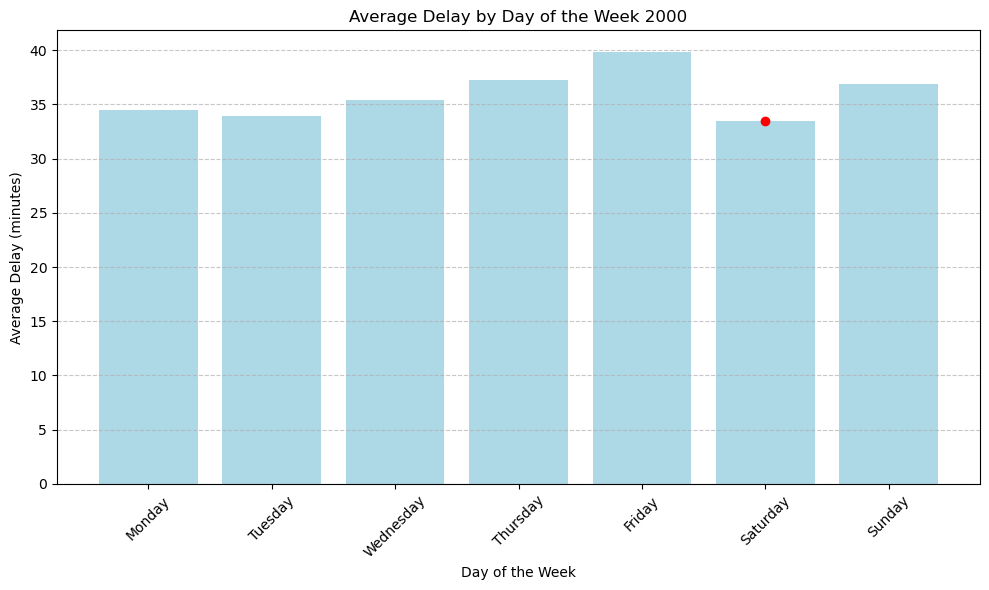

Saturday 33.44482611729945


In [50]:
# csv has been read 

# filter 
df = df00[(df00['Diverted'] == 0) & (df00['Cancelled'] == 0)]

# Mapping 
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'} 

# Map day numbers to day names
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping) 

# Filter the DataFrame to include only delayed flights (ArrDelay and DepDelay > 0)
df = df[(df['ArrDelay'] > 0) & (df['DepDelay'] > 0)]

# Grouping and calculating the mean
day_mean = df.groupby('DayOfWeek').agg({'DepDelay': 'mean', 'ArrDelay': 'mean'}) 

# Calculate average delay
day_mean['Avg_delay'] = (day_mean['DepDelay'] + day_mean['ArrDelay']) / 2 

# Identify 
best_day = day_mean['Avg_delay'].idxmin()  

# Bar graph 

# Reordering the DayOfWeek column  
day_mean = day_mean.reindex(day_mapping.values()) 

# Setting the size of the graph 

rcParams['figure.figsize'] = 10,6

# plotting the full bar graph 
plt.bar(day_mean.index, day_mean['Avg_delay'], color='lightblue')
plt.title('Average Delay by Day of the Week 2000')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a marker 
plt.scatter(best_day, day_mean.loc[best_day, 'Avg_delay'], color='red', label='Best Day') 

# showing the graph
plt.tight_layout()
plt.show()

# Value 
print(best_day, day_mean.loc[best_day, 'Avg_delay']) 

#### From the bar graph we can observe that Friday experiences the highest average delays followed by Thursday. While Tuesday and Saturday experiences the lowest average delays and have almost the same average delay 

### 2001

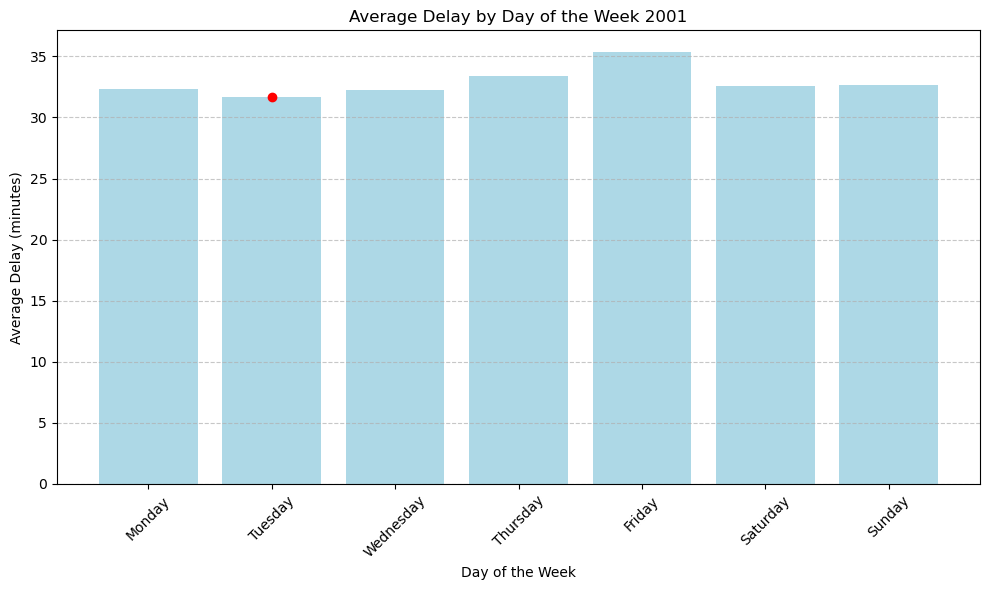

Tuesday 31.651647394186025


In [51]:
# csv has been read 

# filter 
df = df01[(df01['Diverted'] == 0) & (df01['Cancelled'] == 0)]

# Mapping 
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'} 

# Map day numbers to day names
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping) 

# Filter the DataFrame to include only delayed flights (ArrDelay and DepDelay > 0)
df = df[(df['ArrDelay'] > 0) & (df['DepDelay'] > 0)]

# Grouping and calculating the mean
day_mean = df.groupby('DayOfWeek').agg({'DepDelay': 'mean', 'ArrDelay': 'mean'}) 

# Calculate average delay
day_mean['Avg_delay'] = (day_mean['DepDelay'] + day_mean['ArrDelay']) / 2 

# Identify 
best_day = day_mean['Avg_delay'].idxmin()  

# Bar graph 

# Reordering the DayOfWeek column  
day_mean = day_mean.reindex(day_mapping.values()) 

# Setting the size of the graph 

rcParams['figure.figsize'] = 10,6

# plotting the full bar graph 
plt.bar(day_mean.index, day_mean['Avg_delay'], color='lightblue')
plt.title('Average Delay by Day of the Week 2001')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a marker 
plt.scatter(best_day, day_mean.loc[best_day, 'Avg_delay'], color='red', label='Best Day') 

# showing the graph
plt.tight_layout()
plt.show()

# Value 
print(best_day, day_mean.loc[best_day, 'Avg_delay']) 

#### From the bar graph we can observe that Friday experiences the highest average delays followed by Thursday. While Tuesday,  experiences the lowest average delays. We can also observe that Monday, Wednesday and Saturday have generally have the same amount of average delay as well.

### 2002

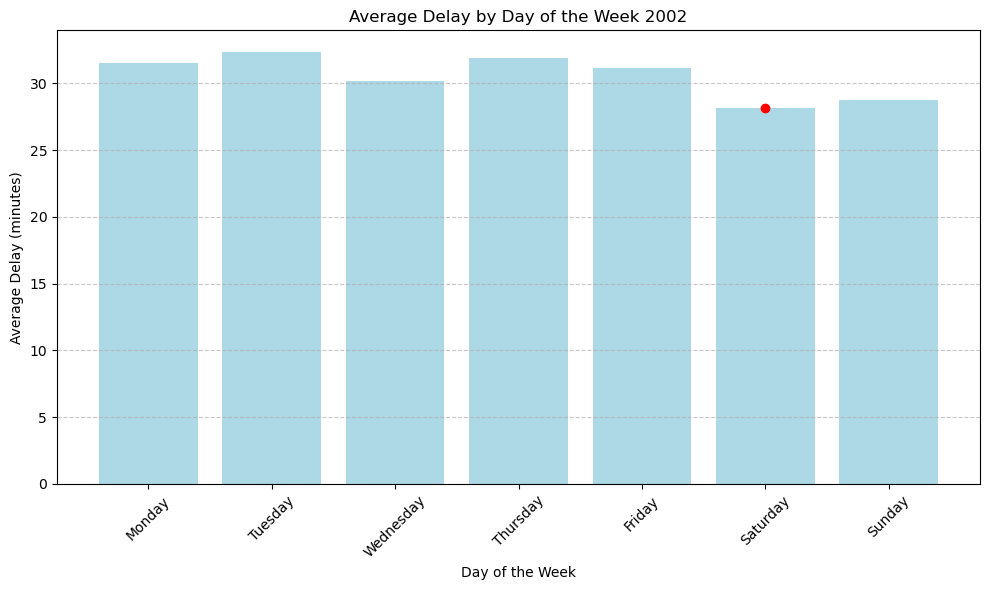

Saturday 28.131869917574818


In [53]:
# csv has been read 

# filter 
df = df02[(df02['Diverted'] == 0) & (df02['Cancelled'] == 0)]

# Mapping 
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'} 

# Map day numbers to day names
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping) 

# Filter the DataFrame to include only delayed flights (ArrDelay and DepDelay > 0)
df = df[(df['ArrDelay'] > 0) & (df['DepDelay'] > 0)]

# Grouping and calculating the mean
day_mean = df.groupby('DayOfWeek').agg({'DepDelay': 'mean', 'ArrDelay': 'mean'}) 

# Calculate average delay
day_mean['Avg_delay'] = (day_mean['DepDelay'] + day_mean['ArrDelay']) / 2 

# Identify 
best_day = day_mean['Avg_delay'].idxmin()  

# Bar graph 

# Reordering the DayOfWeek column  
day_mean = day_mean.reindex(day_mapping.values()) 

# Setting the size of the graph 

rcParams['figure.figsize'] = 10,6

# plotting the full bar graph 
plt.bar(day_mean.index, day_mean['Avg_delay'], color='lightblue')
plt.title('Average Delay by Day of the Week 2002')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a marker 
plt.scatter(best_day, day_mean.loc[best_day, 'Avg_delay'], color='red', label='Best Day') 

# showing the graph
plt.tight_layout()
plt.show()

# Value 
print(best_day, day_mean.loc[best_day, 'Avg_delay']) 

#### From the bar graph we can observe that Tuesday experiences the highest average delays followed by Thursday. While Saturday significantly experiences the lowest average delays

### 2003

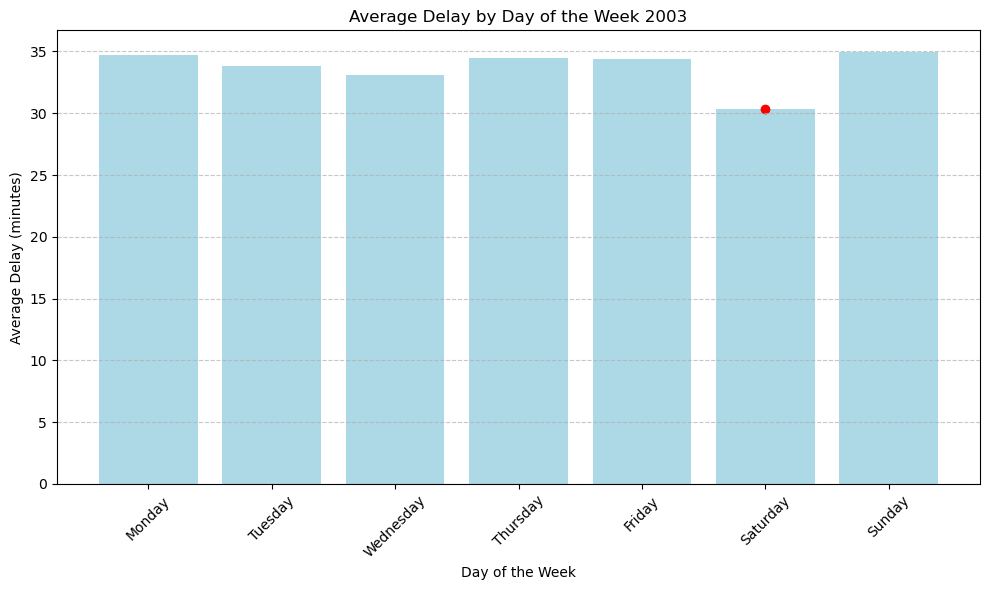

Saturday 30.35984373217748


In [55]:
# csv has been read 

# filter 
df = df03[(df03['Diverted'] == 0) & (df03['Cancelled'] == 0)]

# Mapping 
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'} 

# Map day numbers to day names
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping) 

# Filter the DataFrame to include only delayed flights (ArrDelay and DepDelay > 0)
df = df[(df['ArrDelay'] > 0) & (df['DepDelay'] > 0)]

# Grouping and calculating the mean
day_mean = df.groupby('DayOfWeek').agg({'DepDelay': 'mean', 'ArrDelay': 'mean'}) 

# Calculate average delay
day_mean['Avg_delay'] = (day_mean['DepDelay'] + day_mean['ArrDelay']) / 2 

# Identify 
best_day = day_mean['Avg_delay'].idxmin()  

# Bar graph 

# Reordering the DayOfWeek column  
day_mean = day_mean.reindex(day_mapping.values()) 

# Setting the size of the graph 

rcParams['figure.figsize'] = 10,6

# plotting the full bar graph 
plt.bar(day_mean.index, day_mean['Avg_delay'], color='lightblue')
plt.title('Average Delay by Day of the Week 2003')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a marker 
plt.scatter(best_day, day_mean.loc[best_day, 'Avg_delay'], color='red', label='Best Day') 

# showing the graph
plt.tight_layout()
plt.show()

# Value 
print(best_day, day_mean.loc[best_day, 'Avg_delay']) 

#### From the bar graph we can observe that Sunday experiences the highest average delays. While Saturday significantly experiences the lowest average delays

### 2004

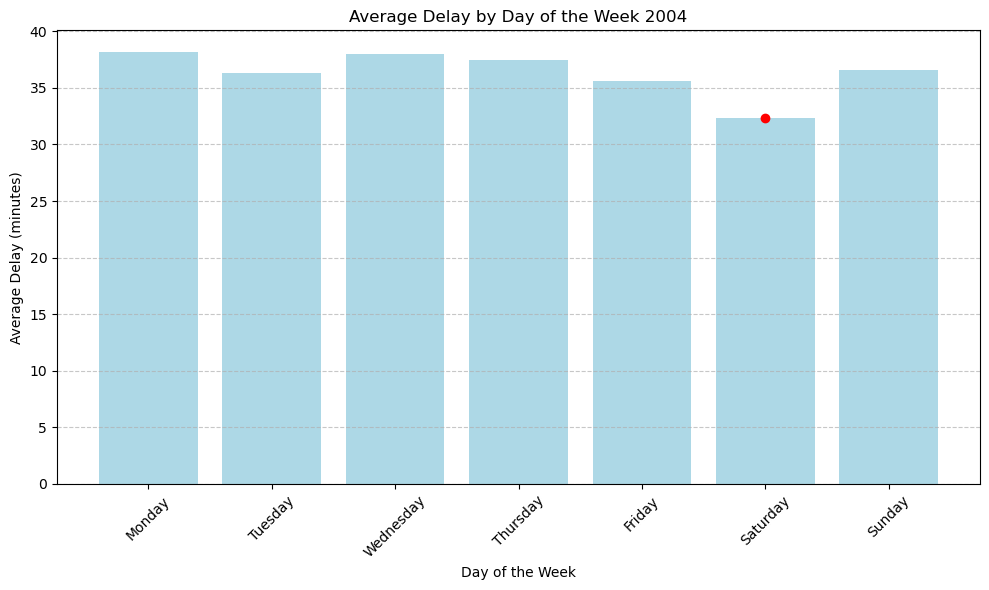

Saturday 32.307594870527396


In [56]:
# csv has been read 

# filter 
df = df04[(df04['Diverted'] == 0) & (df04['Cancelled'] == 0)]

# Mapping 
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'} 

# Map day numbers to day names
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping) 

# Filter the DataFrame to include only delayed flights (ArrDelay and DepDelay > 0)
df = df[(df['ArrDelay'] > 0) & (df['DepDelay'] > 0)]

# Grouping and calculating the mean
day_mean = df.groupby('DayOfWeek').agg({'DepDelay': 'mean', 'ArrDelay': 'mean'}) 

# Calculate average delay
day_mean['Avg_delay'] = (day_mean['DepDelay'] + day_mean['ArrDelay']) / 2 

# Identify 
best_day = day_mean['Avg_delay'].idxmin()  

# Bar graph 

# Reordering the DayOfWeek column  
day_mean = day_mean.reindex(day_mapping.values()) 

# Setting the size of the graph 

rcParams['figure.figsize'] = 10,6

# plotting the full bar graph 
plt.bar(day_mean.index, day_mean['Avg_delay'], color='lightblue')
plt.title('Average Delay by Day of the Week 2004')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a marker 
plt.scatter(best_day, day_mean.loc[best_day, 'Avg_delay'], color='red', label='Best Day') 

# showing the graph
plt.tight_layout()
plt.show()

# Value 
print(best_day, day_mean.loc[best_day, 'Avg_delay']) 

#### From the bar graph we can observe that Wednesday and Monday have the highest average delays. While Saturday significantly experiences the lowest average delays

### 2005

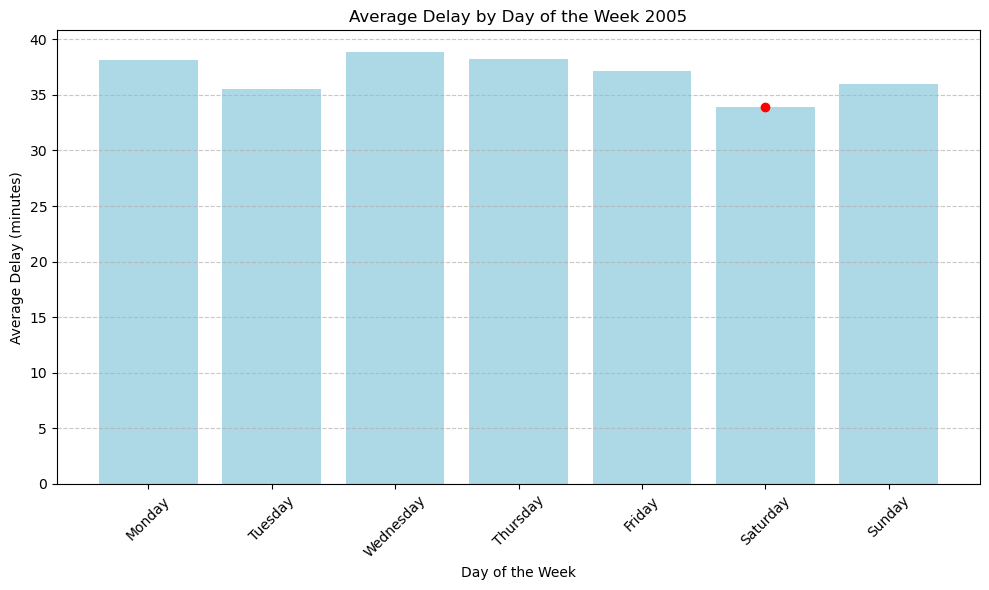

Saturday 33.88532203435817


In [57]:
# csv has been read  

# filter 
df = df05[(df05['Diverted'] == 0) & (df05['Cancelled'] == 0)]

# Mapping 
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'} 

# Map day numbers to day names
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping) 

# Filter the DataFrame to include only delayed flights (ArrDelay and DepDelay > 0)
df = df[(df['ArrDelay'] > 0) & (df['DepDelay'] > 0)]

# Grouping and calculating the mean
day_mean = df.groupby('DayOfWeek').agg({'DepDelay': 'mean', 'ArrDelay': 'mean'}) 

# Calculate average delay
day_mean['Avg_delay'] = (day_mean['DepDelay'] + day_mean['ArrDelay']) / 2 

# Identify 
best_day = day_mean['Avg_delay'].idxmin()  

# Bar graph 

# Reordering the DayOfWeek column  
day_mean = day_mean.reindex(day_mapping.values()) 

# Setting the size of the graph 

rcParams['figure.figsize'] = 10,6

# plotting the full bar graph 
plt.bar(day_mean.index, day_mean['Avg_delay'], color='lightblue')
plt.title('Average Delay by Day of the Week 2005')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a marker 
plt.scatter(best_day, day_mean.loc[best_day, 'Avg_delay'], color='red', label='Best Day') 

# showing the graph
plt.tight_layout()
plt.show()

# Value 
print(best_day, day_mean.loc[best_day, 'Avg_delay']) 

#### From the bar graph we can observe that Wednesday experiences the highest average delays followed closely by Thursday and Monday. While Saturday experiences the lowest average delays

### 2006

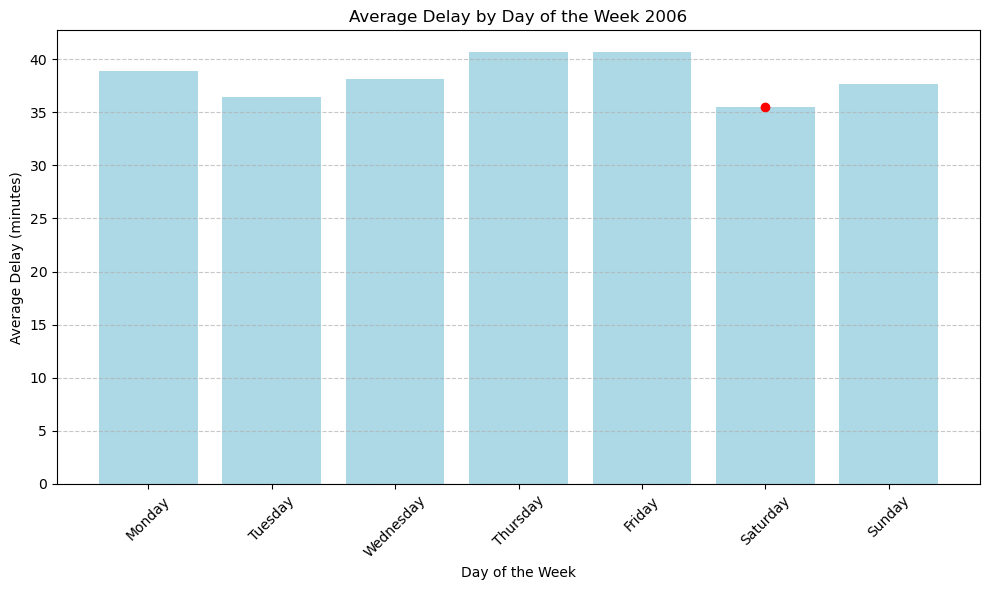

Saturday 35.47115634352661


In [58]:
# csv has been read 

# filter 
df = df06[(df06['Diverted'] == 0) & (df06['Cancelled'] == 0)]

# Mapping 
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'} 

# Map day numbers to day names
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping) 

# Filter the DataFrame to include only delayed flights (ArrDelay and DepDelay > 0)
df = df[(df['ArrDelay'] > 0) & (df['DepDelay'] > 0)]

# Grouping and calculating the mean
day_mean = df.groupby('DayOfWeek').agg({'DepDelay': 'mean', 'ArrDelay': 'mean'}) 

# Calculate average delay
day_mean['Avg_delay'] = (day_mean['DepDelay'] + day_mean['ArrDelay']) / 2 

# Identify 
best_day = day_mean['Avg_delay'].idxmin()  

# Bar graph 

# Reordering the DayOfWeek column  
day_mean = day_mean.reindex(day_mapping.values()) 

# Setting the size of the graph 

rcParams['figure.figsize'] = 10,6

# plotting the full bar graph 
plt.bar(day_mean.index, day_mean['Avg_delay'], color='lightblue')
plt.title('Average Delay by Day of the Week 2006')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a marker 
plt.scatter(best_day, day_mean.loc[best_day, 'Avg_delay'], color='red', label='Best Day') 

# showing the graph
plt.tight_layout()
plt.show()

# Value 
print(best_day, day_mean.loc[best_day, 'Avg_delay']) 

#### From the bar graph we can observe that Friday and Thursday experiences the highest average delays. While Saturday experiences the lowest average delays

### 2007

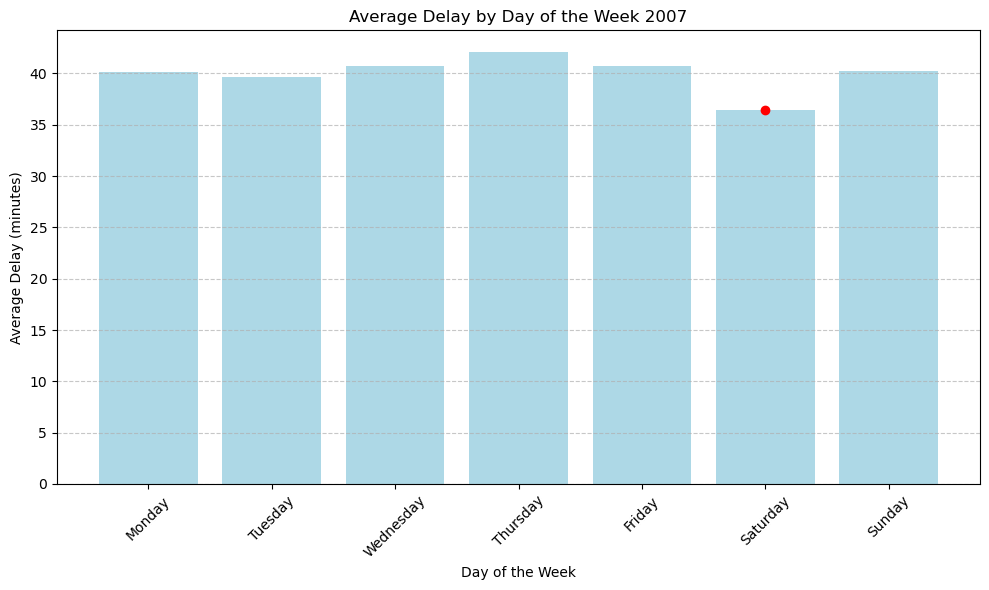

Saturday 36.39813388023576


In [59]:
# csv has been read 

# filter 
df = df07[(df07['Diverted'] == 0) & (df07['Cancelled'] == 0)]

# Mapping 
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'} 

# Map day numbers to day names
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping) 

# Filter the DataFrame to include only delayed flights (ArrDelay and DepDelay > 0)
df = df[(df['ArrDelay'] > 0) & (df['DepDelay'] > 0)]

# Grouping and calculating the mean
day_mean = df.groupby('DayOfWeek').agg({'DepDelay': 'mean', 'ArrDelay': 'mean'}) 

# Calculate average delay
day_mean['Avg_delay'] = (day_mean['DepDelay'] + day_mean['ArrDelay']) / 2 

# Identify 
best_day = day_mean['Avg_delay'].idxmin()  

# Bar graph 

# Reordering the DayOfWeek column  
day_mean = day_mean.reindex(day_mapping.values()) 

# Setting the size of the graph 

rcParams['figure.figsize'] = 10,6

# plotting the full bar graph 
plt.bar(day_mean.index, day_mean['Avg_delay'], color='lightblue')
plt.title('Average Delay by Day of the Week 2007')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a marker 
plt.scatter(best_day, day_mean.loc[best_day, 'Avg_delay'], color='red', label='Best Day') 

# showing the graph
plt.tight_layout()
plt.show()

# Value 
print(best_day, day_mean.loc[best_day, 'Avg_delay']) 

#### From the bar graph we can observe that Thursday experiences the highest average delays followed closely by Friday and Wednesday. While Saturday experiences the lowest average delays. Monday and Sunday have similiar average delay 

### 2008

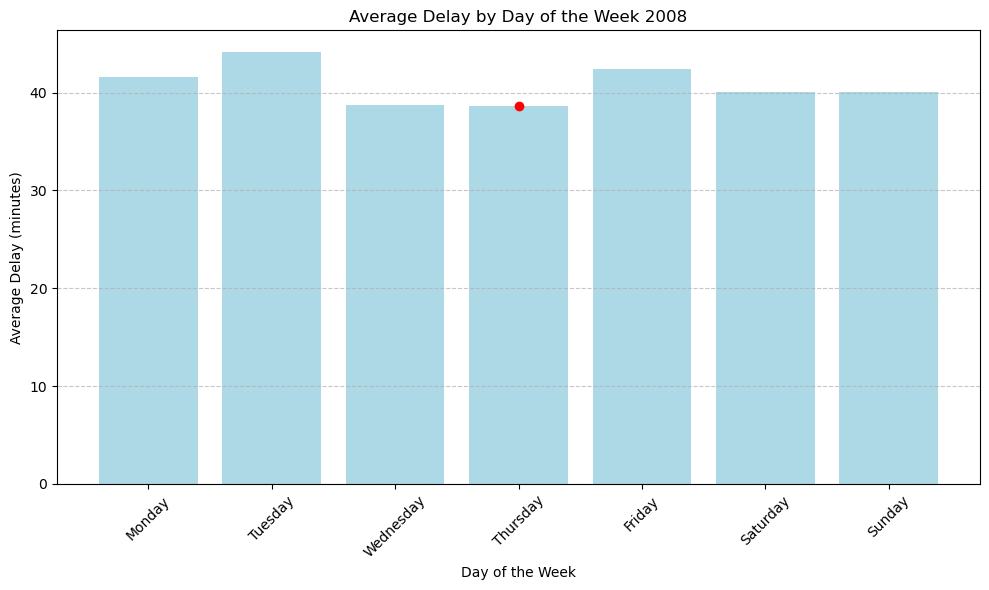

Thursday 38.59438670154185


In [60]:
# read the csv

# filter
df = df08[(df08['Diverted'] == 0) & (df08['Cancelled'] == 0)]

# Mapping 
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'} 

# Map day numbers to day names
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping) 

# Filter the DataFrame to include only delayed flights (ArrDelay and DepDelay > 0)
df = df[(df['ArrDelay'] > 0) & (df['DepDelay'] > 0)]

# Grouping and calculating the mean
day_mean = df.groupby('DayOfWeek').agg({'DepDelay': 'mean', 'ArrDelay': 'mean'}) 

# Calculate average delay
day_mean['Avg_delay'] = (day_mean['DepDelay'] + day_mean['ArrDelay']) / 2 

# Identify 
best_day = day_mean['Avg_delay'].idxmin()  

# Bar graph 

# Reordering the DayOfWeek column  
day_mean = day_mean.reindex(day_mapping.values()) 

# Setting the size of the graph 

rcParams['figure.figsize'] = 10,6

# plotting the full bar graph 
plt.bar(day_mean.index, day_mean['Avg_delay'], color='lightblue')
plt.title('Average Delay by Day of the Week 2008')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a marker 
plt.scatter(best_day, day_mean.loc[best_day, 'Avg_delay'], color='red', label='Best Day') 

# showing the graph
plt.tight_layout()
plt.show()

# Value 
print(best_day, day_mean.loc[best_day, 'Avg_delay']) 

#### From the bar graph we can observe that Tuesday experiences the highest average delays followed by Monday and Friday While Wednesday and Thursday experiences the lowest average delays. Saturday and Sunday have similiar average delays

## Condensing 10 years worth of data into a heatmap

#### We will be looking at both ArrDelay and DepDelay. We will have to read all the different csvs again ( code to read found near the start of the whole coding process ) 

#### We filter out diverted and cancelled flights and filter the columns that we want to specifically keep 

#### We then combined all the years df into 1 dataframe 

In [3]:
# List of DataFrames with only specified columns and filtered for non-diverted and non-cancelled flights
dfs_total = [
    df99[(df99['Diverted'] == 0) & (df99['Cancelled'] == 0)][['ArrDelay', 'DepDelay', 'Year', 'DayOfWeek']],
    df00[(df00['Diverted'] == 0) & (df00['Cancelled'] == 0)][['ArrDelay', 'DepDelay', 'Year', 'DayOfWeek']],
    df01[(df01['Diverted'] == 0) & (df01['Cancelled'] == 0)][['ArrDelay', 'DepDelay', 'Year', 'DayOfWeek']],
    df02[(df02['Diverted'] == 0) & (df02['Cancelled'] == 0)][['ArrDelay', 'DepDelay', 'Year', 'DayOfWeek']],
    df03[(df03['Diverted'] == 0) & (df03['Cancelled'] == 0)][['ArrDelay', 'DepDelay', 'Year', 'DayOfWeek']],
    df04[(df04['Diverted'] == 0) & (df04['Cancelled'] == 0)][['ArrDelay', 'DepDelay', 'Year', 'DayOfWeek']],
    df05[(df05['Diverted'] == 0) & (df05['Cancelled'] == 0)][['ArrDelay', 'DepDelay', 'Year', 'DayOfWeek']],
    df06[(df06['Diverted'] == 0) & (df06['Cancelled'] == 0)][['ArrDelay', 'DepDelay', 'Year', 'DayOfWeek']],
    df07[(df07['Diverted'] == 0) & (df07['Cancelled'] == 0)][['ArrDelay', 'DepDelay', 'Year', 'DayOfWeek']],
    df08[(df08['Diverted'] == 0) & (df08['Cancelled'] == 0)][['ArrDelay', 'DepDelay', 'Year', 'DayOfWeek']]
]

# Combine all dataframes into one
df_combined = pd.concat(dfs_total)


#### Creating the dataframe that matches DayOfWeek numbers to the names of the different days in the week and creating the Avg_delay column just like the individual years section. But now we are also keeping DepDelay and ArrDelay column for comparison in the plotting section

In [4]:
# Mapping day numbers to day names
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

df_combined['DayOfWeek'] = df_combined['DayOfWeek'].map(day_mapping)

# Filter the DataFrame to include only delayed flights (ArrDelay and DepDelay > 0)
df_combined = df_combined[(df_combined['ArrDelay'] > 0) & (df_combined['DepDelay'] > 0)]

# Grouping and calculating the mean delay
day_mean = df_combined.groupby('DayOfWeek').agg({'DepDelay': 'mean', 'ArrDelay': 'mean'})

# Calculate average delay
day_mean['Avg_delay'] = (day_mean['DepDelay'] + day_mean['ArrDelay']) / 2

# Print the mean delay for each day of the week
print(day_mean)

            DepDelay   ArrDelay  Avg_delay
DayOfWeek                                 
Friday     36.152060  38.680358  37.416209
Monday     35.397133  37.764454  36.580793
Saturday   33.252528  33.870650  33.561589
Sunday     34.954648  36.692855  35.823752
Thursday   35.620406  38.788874  37.204640
Tuesday    34.186578  36.882775  35.534677
Wednesday  34.726792  37.771857  36.249324


#### Plotting the 10 years into a heat map, using colours to visualise which Day corressponds to a higher DepDelay,  ArrDelay,  Avg_delay ( ie adding the mean of DepDelay and ArrDelay and then finding the mean of the summation mean)

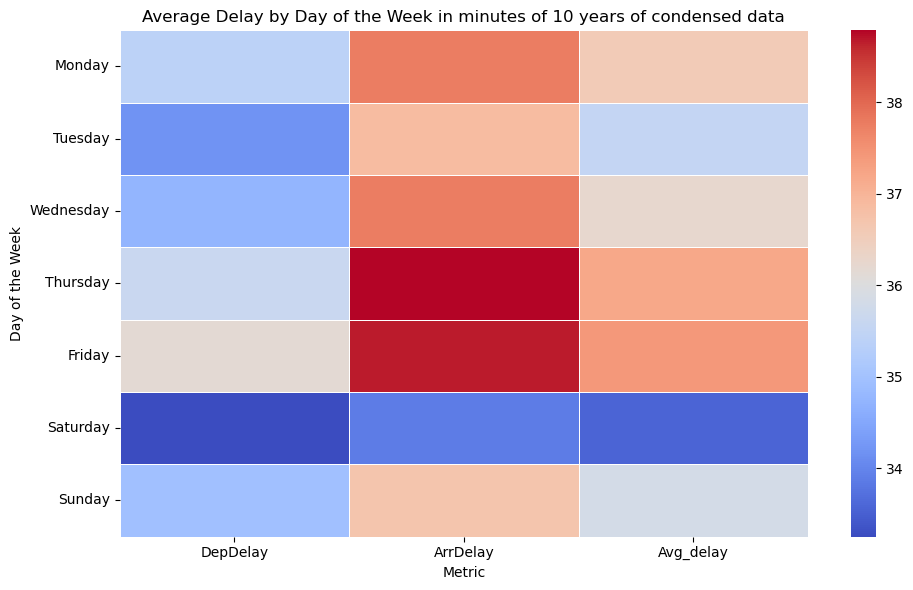

In [7]:
import seaborn as sns

rcParams['figure.figsize'] = 10,6

# Reordering the days of the week for better visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_mean = day_mean.reindex(day_order)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(day_mean, cmap='coolwarm', linewidths=0.5)
plt.title('Average Delay by Day of the Week in minutes of 10 years of condensed data')
plt.xlabel('Metric')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()

#### We can observe that Saturday's DepDelay experiences the lowest overall delay while Friday's ArrDelay experiences the highest overall delay

#### In DepDelay, Saturday experiences the lowest delay while Friday experiences the highest 

#### in ArrDelay, Saturday experiences the lowest delay while Friday experiences the highest 

#### in Avg_delay, Saturday experiences the lowest delay while Friday experiences the highest 

#### In summary, overall Saturday experiences the lowest delays while Friday experiences the highest delays